In [1]:
import os
import vcf
from pathlib import Path
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
from matplotlib.pyplot import figure
import numpy as np
import vcf
import pysam
from Bio.Seq import Seq
from Bio import SeqIO
from Bio.Restriction import RestrictionBatch
from tqdm import tqdm
from scipy import ndimage, datasets


During startup - Warning messages:
1: package ‘methods’ was built under R version 4.2.3 
2: package ‘datasets’ was built under R version 4.2.3 
3: package ‘utils’ was built under R version 4.2.3 
4: package ‘grDevices’ was built under R version 4.2.3 
5: package ‘graphics’ was built under R version 4.2.3 
6: package ‘stats’ was built under R version 4.2.3 


In [2]:
proj_dir="/master/nplatt/sch_hae_scan"
results_dir="{}/results".format(proj_dir)

os.chdir(proj_dir)

In [3]:
Path("{}/rflps".format(results_dir)).mkdir(parents=True, exist_ok=True)
os.chdir("{}/rflps".format(results_dir))

In [4]:
pca_df=pd.read_csv(f"{results_dir}/pca/pca_df.csv", sep=",")
vcf_file = f"{results_dir}/post_phase_filtering/autosomes_unrelated.vcf"

In [7]:
pca_df

,sample_name,1,2,3,4,5,6,7,8,9,...,locale,host,phenotype,project,data_type,lat,lon,kmeans_group,pca_species,kmeans_label
0,Sb_NG_au_1.2,-0.173881,0.026648,0.002356,0.003491,0.040333,0.056209,0.034671,-0.018987,0.006714,...,na,cow,bovis,nigeria,genome,7.067448,6.271139,2,s_bovis,sb
1,Sb_NG_au_2.10,-0.173042,0.026219,0.002305,0.004889,0.041296,0.059342,0.034267,-0.018533,0.003969,...,na,cow,bovis,nigeria,genome,7.067448,6.271139,2,s_bovis,sb
2,Sb_NG_au_2.13,-0.173645,0.026263,0.002368,0.000767,0.042174,0.060543,0.032764,-0.020686,0.002916,...,na,cow,bovis,nigeria,genome,7.067448,6.271139,2,s_bovis,sb
3,Sb_NG_au_2.5,-0.172982,0.026137,0.003690,-0.002314,0.042092,0.059532,0.033454,-0.014835,0.000759,...,na,cow,bovis,nigeria,genome,7.067448,6.271139,2,s_bovis,sb
4,Sb_NG_au_2.6,-0.172250,0.026551,0.002041,0.004355,0.042407,0.059827,0.033576,-0.020790,0.009542,...,na,cow,bovis,nigeria,genome,7.067448,6.271139,2,s_bovis,sb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,ssp_niger_libore_167,0.023576,-0.078099,-0.011150,-0.061000,0.017043,-0.045486,0.040388,-0.017674,0.024366,...,na,snail,unk,scan_africa,genome,13.390080,2.197110,0,s_haematobium,sh_nw
167,ssp_niger_libore_168,0.022321,-0.076938,-0.018901,-0.060000,0.006243,-0.004137,0.029055,-0.042276,0.080228,...,na,snail,unk,scan_africa,genome,13.390080,2.197110,0,s_haematobium,sh_nw
168,ssp_niger_libore_169,0.023969,-0.073719,-0.019718,-0.050199,0.016409,-0.015895,0.038597,-0.020768,0.037634,...,na,snail,unk,scan_africa,genome,13.404170,2.188020,0,s_haematobium,sh_nw
169,ssp_niger_libore_173,0.026690,-0.083394,-0.003446,-0.070261,-0.010403,-0.085303,0.096133,-0.115088,0.082561,...,na,snail,unk,scan_africa,genome,13.404170,2.188020,0,s_haematobium,sh_nw


In [6]:
#get samples per species (post pca classification)
a = pca_df.loc[pca_df["pca_species"] == "s_bovis"]["sample_name"].values
np.savetxt("sb.list", a, fmt="%s")

a = pca_df.loc[pca_df["pca_species"] == "s_haematobium"]["sample_name"].values
np.savetxt("sh.list", a, fmt="%s")

In [31]:
!conda run -n popstructure --cwd . --live-stream vcftools --vcf {vcf_file} --weir-fst-pop sb.list --weir-fst-pop sh.list


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf /master/nplatt/sch_hae_scan/results/post_phase_filtering/autosomes_unrelated.vcf
	--weir-fst-pop sb.list
	--weir-fst-pop sh.list
	--keep sb.list
	--keep sh.list

Keeping individuals in 'keep' list
After filtering, kept 162 out of 166 Individuals
Outputting Weir and Cockerham Fst estimates.
Weir and Cockerham mean Fst estimate: 0.31672
Weir and Cockerham weighted Fst estimate: 0.7795
After filtering, kept 24638821 out of a possible 24638821 Sites
Run Time = 446.00 seconds


In [7]:
fst_df = pd.read_csv("out.weir.fst", sep="\t", header=0)
fst_df

,CHROM,POS,WEIR_AND_COCKERHAM_FST
0,NC_067196.1,124225,NaN
1,NC_067196.1,124230,NaN
2,NC_067196.1,124256,NaN
3,NC_067196.1,124262,NaN
4,NC_067196.1,124281,NaN
...,...,...,...
24638816,NC_067202.1,19478806,-0.011820
24638817,NC_067202.1,19478807,0.336219
24638818,NC_067202.1,19478810,NaN
24638819,NC_067202.1,19478815,0.232829


In [8]:
fst_df.columns=["chrom", "pos", "fst"]
fst_df.dropna(inplace=True)
fst_df

,chrom,pos,fst
5,NC_067196.1,124285,0.677405
6,NC_067196.1,124292,0.074140
7,NC_067196.1,124296,0.018732
8,NC_067196.1,124305,0.289749
9,NC_067196.1,124309,0.702103
...,...,...,...
24638815,NC_067202.1,19478785,0.302548
24638816,NC_067202.1,19478806,-0.011820
24638817,NC_067202.1,19478807,0.336219
24638819,NC_067202.1,19478815,0.232829


In [9]:
fixed_df = fst_df[fst_df["fst"] == 1].copy()

In [9]:
fixed_df["start"] =  fixed_df["pos"] - 400
fixed_df["end"]   =  fixed_df["pos"] + 400
fixed_df.reset_index(inplace=True, drop=True)
fixed_df

,chrom,pos,fst,start,end
0,NC_067196.1,3802562,1.0,3802162,3802962
1,NC_067196.1,3803246,1.0,3802846,3803646
2,NC_067196.1,3890972,1.0,3890572,3891372
3,NC_067196.1,3914307,1.0,3913907,3914707
4,NC_067196.1,3996636,1.0,3996236,3997036
...,...,...,...,...,...
269774,NC_067202.1,17514056,1.0,17513656,17514456
269775,NC_067202.1,17567831,1.0,17567431,17568231
269776,NC_067202.1,17729029,1.0,17728629,17729429
269777,NC_067202.1,17732629,1.0,17732229,17733029


In [10]:
fixed_df[["chrom", "pos"]].to_csv("fixed_sites.list", sep="\t", header=None, index=False)

In [11]:
!conda run -n popstructure --cwd . --live-stream vcftools --vcf {vcf_file} --positions fixed_sites.list --recode --recode-INFO-all --stdout >fixed_sites.vcf

In [12]:
vcf_reader = vcf.Reader(open("fixed_sites.vcf", 'r'))

In [13]:
fixed_df['ref'] = ''
fixed_df['alt'] = ''

# Create a dictionary to store variant records indexed by 'chrom' and 'pos'
variant_records = {}

# Read the VCF file line by line and add variant records to the dictionary
for record in tqdm(vcf_reader):
    chrom = record.CHROM
    pos = record.POS
    key = f"{chrom}:{pos}"
    variant_records[key] = record

269779it [03:26, 1307.60it/s]


In [14]:
# Iterate through the DataFrame and add alleles
for index, row in tqdm(fixed_df.iterrows()):
    chrom = row['chrom']
    pos = row['pos']
    key = f"{chrom}:{pos}"

    # Find the variant record in the variant_records dictionary
    variant_record = variant_records[key]

    if variant_record:
        # Add reference and alternate alleles to the DataFrame
        fixed_df.at[index, 'ref'] = variant_record.REF
        fixed_df.at[index, 'alt'] = ','.join([str(alt) for alt in variant_record.ALT])

269779it [00:17, 15701.35it/s]


In [15]:
fixed_df

,chrom,pos,fst,start,end,ref,alt
0,NC_067196.1,3802562,1.0,3802162,3802962,C,T
1,NC_067196.1,3803246,1.0,3802846,3803646,G,A
2,NC_067196.1,3890972,1.0,3890572,3891372,T,G
3,NC_067196.1,3914307,1.0,3913907,3914707,G,A
4,NC_067196.1,3996636,1.0,3996236,3997036,G,A
...,...,...,...,...,...,...,...
269774,NC_067202.1,17514056,1.0,17513656,17514456,A,C
269775,NC_067202.1,17567831,1.0,17567431,17568231,A,G
269776,NC_067202.1,17729029,1.0,17728629,17729429,A,G
269777,NC_067202.1,17732629,1.0,17732229,17733029,T,C


In [16]:
genome_fas = "/master/nplatt/sch_hae_scan/data/GCF_000699445.3_UoM_Shae.V3_genomic.fna"
genome_dict = SeqIO.to_dict(SeqIO.parse(genome_fas, "fasta"))

fixed_df['ref_fas'] = ''

for index, row in tqdm(fixed_df.iterrows()):
    chrom = row['chrom']
    start = row['start']
    stop = row['end']

    sequence = genome_dict[chrom][start-1:stop].seq

    fixed_df.loc[index, 'ref_fas'] = str(sequence)

269779it [05:51, 767.97it/s]


In [17]:
#create an alternate sequence

In [18]:
fixed_df['alt_fas'] = ''

for index, row in tqdm(fixed_df.iterrows()):
    ref_fas = row['ref_fas']
    alt_allele = row['alt']

    # Replace character 401 (0-based index 400) with the alt_allele value
    alt_fas = ref_fas[:400] + alt_allele + ref_fas[401:]

    # Save the modified sequence in the 'alt_fas' column
    fixed_df.at[index, 'alt_fas'] = alt_fas
fixed_df

269779it [00:13, 20606.54it/s]


,chrom,pos,fst,start,end,ref,alt,ref_fas,alt_fas
0,NC_067196.1,3802562,1.0,3802162,3802962,C,T,tttaagaAAGATTATGAACCGAAAAATGATAAGTCCAACATGAAAA...,tttaagaAAGATTATGAACCGAAAAATGATAAGTCCAACATGAAAA...
1,NC_067196.1,3803246,1.0,3802846,3803646,G,A,CCTGTTATCGATTATTACAATGTGCCATTACCATGGACAAATATCA...,CCTGTTATCGATTATTACAATGTGCCATTACCATGGACAAATATCA...
2,NC_067196.1,3890972,1.0,3890572,3891372,T,G,TAAAAAACGACAGTGCCatcattcattcttcttgaagTATTAAAGT...,TAAAAAACGACAGTGCCatcattcattcttcttgaagTATTAAAGT...
3,NC_067196.1,3914307,1.0,3913907,3914707,G,A,gtgctaatgaggtatggcaacttgtaccgatgcatatatgtgccta...,gtgctaatgaggtatggcaacttgtaccgatgcatatatgtgccta...
4,NC_067196.1,3996636,1.0,3996236,3997036,G,A,GATTATTCGATATCATACAGTACTGTTGTGTTAATGCTTAGTTGAA...,GATTATTCGATATCATACAGTACTGTTGTGTTAATGCTTAGTTGAA...
...,...,...,...,...,...,...,...,...,...
269774,NC_067202.1,17514056,1.0,17513656,17514456,A,C,taagaataatgagtggtaattttttCGGACTGAGGCTGAGAcgtgt...,taagaataatgagtggtaattttttCGGACTGAGGCTGAGAcgtgt...
269775,NC_067202.1,17567831,1.0,17567431,17568231,A,G,aatgatttgttttttttttttgctCTTTCCCTCTTCCCCCCTCTCT...,aatgatttgttttttttttttgctCTTTCCCTCTTCCCCCCTCTCT...
269776,NC_067202.1,17729029,1.0,17728629,17729429,A,G,GTGAATAGAGAAGTTACCTCTAGTAGTATATCTGTGGTCAGACTAA...,GTGAATAGAGAAGTTACCTCTAGTAGTATATCTGTGGTCAGACTAA...
269777,NC_067202.1,17732629,1.0,17732229,17733029,T,C,GTTTAAATATTCCCGTTGATGTTATGGATTTCAGTGGTTGTGACTT...,GTTTAAATATTCCCGTTGATGTTATGGATTTCAGTGGTTGTGACTT...


In [19]:
#find loci with repeat sequences
fixed_df["contains_repeats"] = fixed_df['ref_fas'].str.contains(r'[a-z]', regex=True)
#fixed_df = fixed_df.loc[fixed_df["contains_repeats"] == False].copy()
fixed_df

,chrom,pos,fst,start,end,ref,alt,ref_fas,alt_fas,contains_repeats
0,NC_067196.1,3802562,1.0,3802162,3802962,C,T,tttaagaAAGATTATGAACCGAAAAATGATAAGTCCAACATGAAAA...,tttaagaAAGATTATGAACCGAAAAATGATAAGTCCAACATGAAAA...,True
1,NC_067196.1,3803246,1.0,3802846,3803646,G,A,CCTGTTATCGATTATTACAATGTGCCATTACCATGGACAAATATCA...,CCTGTTATCGATTATTACAATGTGCCATTACCATGGACAAATATCA...,True
2,NC_067196.1,3890972,1.0,3890572,3891372,T,G,TAAAAAACGACAGTGCCatcattcattcttcttgaagTATTAAAGT...,TAAAAAACGACAGTGCCatcattcattcttcttgaagTATTAAAGT...,True
3,NC_067196.1,3914307,1.0,3913907,3914707,G,A,gtgctaatgaggtatggcaacttgtaccgatgcatatatgtgccta...,gtgctaatgaggtatggcaacttgtaccgatgcatatatgtgccta...,True
4,NC_067196.1,3996636,1.0,3996236,3997036,G,A,GATTATTCGATATCATACAGTACTGTTGTGTTAATGCTTAGTTGAA...,GATTATTCGATATCATACAGTACTGTTGTGTTAATGCTTAGTTGAA...,True
...,...,...,...,...,...,...,...,...,...,...
269774,NC_067202.1,17514056,1.0,17513656,17514456,A,C,taagaataatgagtggtaattttttCGGACTGAGGCTGAGAcgtgt...,taagaataatgagtggtaattttttCGGACTGAGGCTGAGAcgtgt...,True
269775,NC_067202.1,17567831,1.0,17567431,17568231,A,G,aatgatttgttttttttttttgctCTTTCCCTCTTCCCCCCTCTCT...,aatgatttgttttttttttttgctCTTTCCCTCTTCCCCCCTCTCT...,True
269776,NC_067202.1,17729029,1.0,17728629,17729429,A,G,GTGAATAGAGAAGTTACCTCTAGTAGTATATCTGTGGTCAGACTAA...,GTGAATAGAGAAGTTACCTCTAGTAGTATATCTGTGGTCAGACTAA...,True
269777,NC_067202.1,17732629,1.0,17732229,17733029,T,C,GTTTAAATATTCCCGTTGATGTTATGGATTTCAGTGGTTGTGACTT...,GTTTAAATATTCCCGTTGATGTTATGGATTTCAGTGGTTGTGACTT...,True


In [20]:
fixed_df.to_csv("fixed_df.csv", sep=",", header=True, index=False)

In [135]:
fixed_df=pd.read_csv("fixed_df.csv", sep=",", header=0)
fixed_df

,chrom,pos,fst,start,end,ref,alt,ref_fas,alt_fas,contains_repeats
0,NC_067196.1,3802562,1.0,3802162,3802962,C,T,tttaagaAAGATTATGAACCGAAAAATGATAAGTCCAACATGAAAA...,tttaagaAAGATTATGAACCGAAAAATGATAAGTCCAACATGAAAA...,True
1,NC_067196.1,3803246,1.0,3802846,3803646,G,A,CCTGTTATCGATTATTACAATGTGCCATTACCATGGACAAATATCA...,CCTGTTATCGATTATTACAATGTGCCATTACCATGGACAAATATCA...,True
2,NC_067196.1,3890972,1.0,3890572,3891372,T,G,TAAAAAACGACAGTGCCatcattcattcttcttgaagTATTAAAGT...,TAAAAAACGACAGTGCCatcattcattcttcttgaagTATTAAAGT...,True
3,NC_067196.1,3914307,1.0,3913907,3914707,G,A,gtgctaatgaggtatggcaacttgtaccgatgcatatatgtgccta...,gtgctaatgaggtatggcaacttgtaccgatgcatatatgtgccta...,True
4,NC_067196.1,3996636,1.0,3996236,3997036,G,A,GATTATTCGATATCATACAGTACTGTTGTGTTAATGCTTAGTTGAA...,GATTATTCGATATCATACAGTACTGTTGTGTTAATGCTTAGTTGAA...,True
...,...,...,...,...,...,...,...,...,...,...
269774,NC_067202.1,17514056,1.0,17513656,17514456,A,C,taagaataatgagtggtaattttttCGGACTGAGGCTGAGAcgtgt...,taagaataatgagtggtaattttttCGGACTGAGGCTGAGAcgtgt...,True
269775,NC_067202.1,17567831,1.0,17567431,17568231,A,G,aatgatttgttttttttttttgctCTTTCCCTCTTCCCCCCTCTCT...,aatgatttgttttttttttttgctCTTTCCCTCTTCCCCCCTCTCT...,True
269776,NC_067202.1,17729029,1.0,17728629,17729429,A,G,GTGAATAGAGAAGTTACCTCTAGTAGTATATCTGTGGTCAGACTAA...,GTGAATAGAGAAGTTACCTCTAGTAGTATATCTGTGGTCAGACTAA...,True
269777,NC_067202.1,17732629,1.0,17732229,17733029,T,C,GTTTAAATATTCCCGTTGATGTTATGGATTTCAGTGGTTGTGACTT...,GTTTAAATATTCCCGTTGATGTTATGGATTTCAGTGGTTGTGACTT...,True


In [136]:
def single_cutter_enzymes(ref_digest, alt_digest):
    
    dict1 = {str(key): value for key, value in ref_digest.items()}
    dict2 = {str(key): value for key, value in alt_digest.items()}

    #get enzymes that digest more than once
    keys_with_more_than_one_value = list(set([key for key, value in dict1.items() if len(value) != 1]))
    for key in keys_with_more_than_one_value:
        del dict1[key]

    keys_with_more_than_one_value = list(set([key for key, value in dict2.items() if len(value) != 1]))
    for key in keys_with_more_than_one_value:
        del dict2[key]  

    uniq_ref_cutters=list(set(dict1.keys()) - set(dict2.keys()))
    uniq_alt_cutters=list(set(dict2.keys()) - set(dict1.keys()))
    
    return uniq_ref_cutters, uniq_alt_cutters

In [137]:
def find_unique_enzymes(row):
    ref_seq = Seq(row["ref_fas"])
    alt_seq = Seq(row["alt_fas"])

    ref_digest = rb_supp.search(ref_seq)
    alt_digest = rb_supp.search(alt_seq)

    ref_unique, alt_unique = single_cutter_enzymes(ref_digest, alt_digest)

    row["ref_enzymes"] = np.NaN if not ref_unique else ",".join(ref_unique)
    row["alt_enzymes"] = np.NaN if not alt_unique else ",".join(alt_unique)

    return row

In [138]:
rb_supp = RestrictionBatch(first=[], suppliers=["N"])

fixed_df['ref_enzymes'] = ''
fixed_df['alt_enzymes'] = ''

tqdm.pandas()
fixed_df = fixed_df.progress_apply(find_unique_enzymes, axis=1).copy()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 269779/269779 [59:00<00:00, 76.20it/s]


In [ ]:
fixed_df.to_csv("fixed_df_with_enzymes.csv", sep=",", index=False)

In [9]:
fixed_df=pd.read_csv("fixed_df_with_enzymes.csv")
fixed_df

,chrom,pos,fst,start,end,ref,alt,ref_fas,alt_fas,contains_repeats,ref_enzymes,alt_enzymes
0,NC_067196.1,3802562,1.0,3802162,3802962,C,T,tttaagaAAGATTATGAACCGAAAAATGATAAGTCCAACATGAAAA...,tttaagaAAGATTATGAACCGAAAAATGATAAGTCCAACATGAAAA...,True,NaN,NaN
1,NC_067196.1,3803246,1.0,3802846,3803646,G,A,CCTGTTATCGATTATTACAATGTGCCATTACCATGGACAAATATCA...,CCTGTTATCGATTATTACAATGTGCCATTACCATGGACAAATATCA...,True,NaN,NaN
2,NC_067196.1,3890972,1.0,3890572,3891372,T,G,TAAAAAACGACAGTGCCatcattcattcttcttgaagTATTAAAGT...,TAAAAAACGACAGTGCCatcattcattcttcttgaagTATTAAAGT...,True,NaN,NaN
3,NC_067196.1,3914307,1.0,3913907,3914707,G,A,gtgctaatgaggtatggcaacttgtaccgatgcatatatgtgccta...,gtgctaatgaggtatggcaacttgtaccgatgcatatatgtgccta...,True,NaN,NaN
4,NC_067196.1,3996636,1.0,3996236,3997036,G,A,GATTATTCGATATCATACAGTACTGTTGTGTTAATGCTTAGTTGAA...,GATTATTCGATATCATACAGTACTGTTGTGTTAATGCTTAGTTGAA...,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
269774,NC_067202.1,17514056,1.0,17513656,17514456,A,C,taagaataatgagtggtaattttttCGGACTGAGGCTGAGAcgtgt...,taagaataatgagtggtaattttttCGGACTGAGGCTGAGAcgtgt...,True,NaN,NaN
269775,NC_067202.1,17567831,1.0,17567431,17568231,A,G,aatgatttgttttttttttttgctCTTTCCCTCTTCCCCCCTCTCT...,aatgatttgttttttttttttgctCTTTCCCTCTTCCCCCCTCTCT...,True,"ApaLI,Bsp1286I,BaeGI,BsiHKAI","HpyCH4V,SfaNI,FspI"
269776,NC_067202.1,17729029,1.0,17728629,17729429,A,G,GTGAATAGAGAAGTTACCTCTAGTAGTATATCTGTGGTCAGACTAA...,GTGAATAGAGAAGTTACCTCTAGTAGTATATCTGTGGTCAGACTAA...,True,"FokI,BtsCI",NaN
269777,NC_067202.1,17732629,1.0,17732229,17733029,T,C,GTTTAAATATTCCCGTTGATGTTATGGATTTCAGTGGTTGTGACTT...,GTTTAAATATTCCCGTTGATGTTATGGATTTCAGTGGTTGTGACTT...,True,NaN,NaN


In [141]:
#are there variants within 15bp of the target site? 
! cut -f1,2 ../post_phase_filtering/autosomes_unrelated_maf05.vcf | grep -v "#" >sites.list

In [142]:
!awk 'OFS="\t"{print $1, $2-1, $2}' sites.list >sites.bed

In [143]:
!cut -f1,2 fixed_df.csv -d"," | sed 's/,/\t/g' | sed 1d | awk 'OFS="\t"{print $1, $2-1-25, $2+25, $1":"$2}' >binding_regions.bed

In [144]:
!conda run -n bedtools --cwd . bedtools intersect -c -a binding_regions.bed -b sites.bed >sites_in_binding_regions.bed

In [10]:
counts_df=pd.read_csv("sites_in_binding_regions.bed", sep="\t", header=None)
counts_df.columns=["chrom", "start", "stop", "snp_id", "counts"]
counts_df


,chrom,start,stop,snp_id,counts
0,NC_067196.1,3802536,3802587,NC_067196.1:3802562,5
1,NC_067196.1,3803220,3803271,NC_067196.1:3803246,1
2,NC_067196.1,3890946,3890997,NC_067196.1:3890972,2
3,NC_067196.1,3914281,3914332,NC_067196.1:3914307,1
4,NC_067196.1,3996610,3996661,NC_067196.1:3996636,1
...,...,...,...,...,...
269774,NC_067202.1,17514030,17514081,NC_067202.1:17514056,2
269775,NC_067202.1,17567805,17567856,NC_067202.1:17567831,2
269776,NC_067202.1,17729003,17729054,NC_067202.1:17729029,1
269777,NC_067202.1,17732603,17732654,NC_067202.1:17732629,4


In [149]:
snp_ids = fixed_df["chrom"] + ":" + fixed_df["pos"].astype(str)

snp_ids.equals(counts_df["snp_id"])

True

In [150]:
fixed_df["snps_in_binding_region"] = counts_df["counts"]
fixed_df

,chrom,pos,fst,start,end,ref,alt,ref_fas,alt_fas,contains_repeats,ref_enzymes,alt_enzymes,snps_in_binding_region
0,NC_067196.1,3802562,1.0,3802162,3802962,C,T,tttaagaAAGATTATGAACCGAAAAATGATAAGTCCAACATGAAAA...,tttaagaAAGATTATGAACCGAAAAATGATAAGTCCAACATGAAAA...,True,NaN,NaN,5
1,NC_067196.1,3803246,1.0,3802846,3803646,G,A,CCTGTTATCGATTATTACAATGTGCCATTACCATGGACAAATATCA...,CCTGTTATCGATTATTACAATGTGCCATTACCATGGACAAATATCA...,True,NaN,NaN,1
2,NC_067196.1,3890972,1.0,3890572,3891372,T,G,TAAAAAACGACAGTGCCatcattcattcttcttgaagTATTAAAGT...,TAAAAAACGACAGTGCCatcattcattcttcttgaagTATTAAAGT...,True,NaN,NaN,2
3,NC_067196.1,3914307,1.0,3913907,3914707,G,A,gtgctaatgaggtatggcaacttgtaccgatgcatatatgtgccta...,gtgctaatgaggtatggcaacttgtaccgatgcatatatgtgccta...,True,NaN,NaN,1
4,NC_067196.1,3996636,1.0,3996236,3997036,G,A,GATTATTCGATATCATACAGTACTGTTGTGTTAATGCTTAGTTGAA...,GATTATTCGATATCATACAGTACTGTTGTGTTAATGCTTAGTTGAA...,True,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
269774,NC_067202.1,17514056,1.0,17513656,17514456,A,C,taagaataatgagtggtaattttttCGGACTGAGGCTGAGAcgtgt...,taagaataatgagtggtaattttttCGGACTGAGGCTGAGAcgtgt...,True,NaN,NaN,2
269775,NC_067202.1,17567831,1.0,17567431,17568231,A,G,aatgatttgttttttttttttgctCTTTCCCTCTTCCCCCCTCTCT...,aatgatttgttttttttttttgctCTTTCCCTCTTCCCCCCTCTCT...,True,"ApaLI,Bsp1286I,BaeGI,BsiHKAI","HpyCH4V,SfaNI,FspI",2
269776,NC_067202.1,17729029,1.0,17728629,17729429,A,G,GTGAATAGAGAAGTTACCTCTAGTAGTATATCTGTGGTCAGACTAA...,GTGAATAGAGAAGTTACCTCTAGTAGTATATCTGTGGTCAGACTAA...,True,"FokI,BtsCI",NaN,1
269777,NC_067202.1,17732629,1.0,17732229,17733029,T,C,GTTTAAATATTCCCGTTGATGTTATGGATTTCAGTGGTTGTGACTT...,GTTTAAATATTCCCGTTGATGTTATGGATTTCAGTGGTTGTGACTT...,True,NaN,NaN,4


In [151]:
fixed_df.to_csv("fixed_df_with_site_counts.csv", sep=",", index=False)

In [11]:
fixed_df=pd.read_csv("fixed_df_with_site_counts.csv", sep=",")
fixed_df.dropna(subset=['ref_enzymes', 'alt_enzymes'], how='all')


,chrom,pos,fst,start,end,ref,alt,ref_fas,alt_fas,contains_repeats,ref_enzymes,alt_enzymes,snps_in_binding_region
5,NC_067196.1,3997666,1.0,3997266,3998066,T,G,ACTATAACCAATCGCAATATCAGtggttcatttattatttataatt...,ACTATAACCAATCGCAATATCAGtggttcatttattatttataatt...,True,NaN,"BccI,HphI",4
6,NC_067196.1,3998604,1.0,3998204,3999004,A,C,tacttctatgaattcggtgttcatgttgttgtgctaatgaggtatg...,tacttctatgaattcggtgttcatgttgttgtgctaatgaggtatg...,True,ScaI,"RsaI,CviQI",1
7,NC_067196.1,3998656,1.0,3998256,3999056,C,T,tggaccgatgaatagatgtgcctggtcctacgttgtagctgactga...,tggaccgatgaatagatgtgcctggtcctacgttgtagctgactga...,True,NdeI,NaN,2
13,NC_067196.1,4004453,1.0,4004053,4004853,G,C,taagatagtaggtcttggattttgggcgcgaaattcactcatccat...,taagatagtaggtcttggattttgggcgcgaaattcactcatccat...,True,"BpuEI,SmlI","HpyAV,AcuI",3
17,NC_067196.1,4004537,1.0,4004137,4004937,C,T,gttcgtgatgaaaaccctggaTGTAATTCCTAACTGTATATCATCA...,gttcgtgatgaaaaccctggaTGTAATTCCTAACTGTATATCATCA...,True,PsiI,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
269769,NC_067202.1,17478281,1.0,17477881,17478681,C,T,TTTGTTCATTATCATATTCATAAACAAGGTGCATTACCATGTACAC...,TTTGTTCATTATCATATTCATAAACAAGGTGCATTACCATGTACAC...,True,NaN,BciVI,2
269771,NC_067202.1,17478314,1.0,17477914,17478714,G,A,TTACCATGTACACTTCGTCTTCCAATATTTAATAATCAAACATTAT...,TTACCATGTACACTTCGTCTTCCAATATTTAATAATCAAACATTAT...,True,NaN,BfaI,2
269772,NC_067202.1,17479516,1.0,17479116,17479916,C,T,ccgaatcaggtgcttttcttaggaggccacacccagagGCCCTGAC...,ccgaatcaggtgcttttcttaggaggccacacccagagGCCCTGAC...,True,BsmI,NaN,4
269775,NC_067202.1,17567831,1.0,17567431,17568231,A,G,aatgatttgttttttttttttgctCTTTCCCTCTTCCCCCCTCTCT...,aatgatttgttttttttttttgctCTTTCCCTCTTCCCCCCTCTCT...,True,"ApaLI,Bsp1286I,BaeGI,BsiHKAI","HpyCH4V,SfaNI,FspI",2


In [12]:
df=fixed_df.dropna(subset=['ref_enzymes', 'alt_enzymes'], how='all').copy()
df=df.loc[df["snps_in_binding_region"] == 1].copy()
df

,chrom,pos,fst,start,end,ref,alt,ref_fas,alt_fas,contains_repeats,ref_enzymes,alt_enzymes,snps_in_binding_region
6,NC_067196.1,3998604,1.0,3998204,3999004,A,C,tacttctatgaattcggtgttcatgttgttgtgctaatgaggtatg...,tacttctatgaattcggtgttcatgttgttgtgctaatgaggtatg...,True,ScaI,"RsaI,CviQI",1
32,NC_067196.1,4005569,1.0,4005169,4005969,G,A,GGAGGAAATACGTTCATGGGTATGAGCCCGCTTCAACTTTCCAGTG...,GGAGGAAATACGTTCATGGGTATGAGCCCGCTTCAACTTTCCAGTG...,True,BfaI,XbaI,1
41,NC_067196.1,4006353,1.0,4005953,4006753,T,C,AGTGTGAAACATCACACAAAAATCTTATAAGTTGTAAATTACTATT...,AGTGTGAAACATCACACAAAAATCTTATAAGTTGTAAATTACTATT...,True,Hpy188III,BspHI,1
43,NC_067196.1,4006713,1.0,4006313,4007113,T,G,cacttaataataataataattagttcattgttttcacatttatgag...,cacttaataataataataattagttcattgttttcacatttatgag...,True,AluI,HindIII,1
48,NC_067196.1,4155821,1.0,4155421,4156221,C,T,ATCAATTCATTGCGCTTTCGTTAAAAACTGTTATCAATCTGAGTTA...,ATCAATTCATTGCGCTTTCGTTAAAAACTGTTATCAATCTGAGTTA...,True,NaN,Tsp45I,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
269720,NC_067202.1,15021806,1.0,15021406,15022206,A,T,TTCaatccttattttttattacaGAAACATTTTCCCCTATGAATAC...,TTCaatccttattttttattacaGAAACATTTTCCCCTATGAATAC...,True,NaN,ApoI,1
269730,NC_067202.1,15046757,1.0,15046357,15047157,T,C,cttcctcttttcctttgtttagccttgaggattccatgtgagggct...,cttcctcttttcctttgtttagccttgaggattccatgtgagggct...,True,NaN,HpyAV,1
269751,NC_067202.1,15076917,1.0,15076517,15077317,T,C,aggtagatacctgtctctacctaacacggattagctccaccaGTCA...,aggtagatacctgtctctacctaacacggattagctccaccaGTCA...,True,"HaeIII,Cac8I","MscI,EaeI",1
269758,NC_067202.1,17415073,1.0,17414673,17415473,A,G,aaggtgtacttgtaatcttgaaggaaccaatgctccctgacagatt...,aaggtgtacttgtaatcttgaaggaaccaatgctccctgacagatt...,True,NaN,BceAI,1


In [15]:
df=df.loc[df["contains_repeats"] == False].copy()
df.reset_index(drop=True, inplace=True)
df

,chrom,pos,fst,start,end,ref,alt,ref_fas,alt_fas,contains_repeats,ref_enzymes,alt_enzymes,snps_in_binding_region
0,NC_067196.1,13532674,1.0,13532274,13533074,T,G,ATTTAGGGAATAGTATACCAGTACAGTGTTCATTGTAGACATATTC...,ATTTAGGGAATAGTATACCAGTACAGTGTTCATTGTAGACATATTC...,False,NaN,"BpuEI,SmlI",1
1,NC_067196.1,13928831,1.0,13928431,13929231,C,T,CGCCCCTTTGTACCTTATGATATGAGACGAAACATCCAGGTACAAA...,CGCCCCTTTGTACCTTATGATATGAGACGAAACATCCAGGTACAAA...,False,"BstUI,MspA1I,SacII",FauI,1
2,NC_067196.1,13928903,1.0,13928503,13929303,C,T,AGTTTGTATGGCCAAACATAAACAAAGATGTACGGAAATGGTCACG...,AGTTTGTATGGCCAAACATAAACAAAGATGTACGGAAATGGTCACG...,False,NaN,BtsI,1
3,NC_067196.1,13943066,1.0,13942666,13943466,G,C,GTTTCACTAACAAATGTTAGGTTATCTTGTGTGGCTATGGATTAGT...,GTTTCACTAACAAATGTTAGGTTATCTTGTGTGGCTATGGATTAGT...,False,"EcoRI,ApoI",BstBI,1
4,NC_067196.1,14391486,1.0,14391086,14391886,A,G,CTTTTGTGAAGTCAACAAAATGTCTCTTGAGAACAACAACAGGATG...,CTTTTGTGAAGTCAACAAAATGTCTCTTGAGAACAACAACAGGATG...,False,"ScrFI,PspGI,BstNI,StyD4I",SexAI,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,NC_067202.1,6498779,1.0,6498379,6499179,C,T,GTGGCATACGAACATATCAAGACAAAAGGTTTGACTTACCCTCTTC...,GTGGCATACGAACATATCAAGACAAAAGGTTTGACTTACCCTCTTC...,False,MmeI,NaN,1
1068,NC_067202.1,6608735,1.0,6608335,6609135,A,G,TAATACATTAGGCCCTGTTGCTCTCCCTCGCTTTACATTGTCGGTA...,TAATACATTAGGCCCTGTTGCTCTCCCTCGCTTTACATTGTCGGTA...,False,"RsaI,CviQI",NaN,1
1069,NC_067202.1,6905083,1.0,6904683,6905483,A,G,ACCATGAAAAAGATACAGAGGGTCGTTACTTGTGTAATTCCAGTGT...,ACCATGAAAAAGATACAGAGGGTCGTTACTTGTGTAATTCCAGTGT...,False,"TfiI,HinfI",NaN,1
1070,NC_067202.1,10758815,1.0,10758415,10759215,A,T,AAACAATCAAAAGATAATAACCCAACTTCTTCGATTGGTAAGCTCG...,AAACAATCAAAAGATAATAACCCAACTTCTTCGATTGGTAAGCTCG...,False,TspRI,"Hpy166II,BsrGI,BtsIMutI",1


In [155]:
df.to_csv("clean_sites.csv", sep=",", index=False)

In [156]:
#Check allele frequencies manually with vcftools...also compare to other schistosomes
df[["chrom", "pos"]].to_csv("clean_sites.list", sep="\t", header=False, index=False)

In [157]:
!conda run -n popstructure --cwd . --live-stream vcftools --vcf ../post_phase_filtering/autosomes_unrelated.vcf --positions clean_sites.list --recode --recode-INFO-all --stdout >clean_sites.vcf

In [158]:
%%bash

echo """guineensis_saotome_ERR119612
intercalatum_drcongo_ERR119613
margrebowiei_zambia_ERR310940
matthei_zambia_ERR103051""" >outgroups.list

In [159]:
%%bash

for X in sb sh outgroups; do
    vcftools --vcf clean_sites.vcf --freq --keep ${X}.list --stdout >${X}.freq &
done

wait


VCFtools - 0.1.17
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf clean_sites.vcf
	--keep sb.list
	--freq
	--stdout


VCFtools - 0.1.17
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf clean_sites.vcf
	--keep outgroups.list
	--freq
	--stdout

Keeping individuals in 'keep' list
Keeping individuals in 'keep' list

VCFtools - 0.1.17
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf clean_sites.vcf
	--keep sh.list
	--freq
	--stdout

After filtering, kept 4 out of 166 Individuals
Outputting Frequency Statistics...
Keeping individuals in 'keep' list
After filtering, kept 21 out of 166 Individuals
Outputting Frequency Statistics...
After filtering, kept 141 out of 166 Individuals
Outputting Frequency Statistics...
After filtering, kept 1072 out of a possible 1072 Sites
Run Time = 0.00 seconds
After filtering, kept 1072 out of a possible 1072 Sites
Run Time = 0.00 seconds
After filtering, kept 1072 out of a po

In [160]:
for pop in ["sb", "sh", "outgroups"]:
    pop_df = pd.read_csv(f"{pop}.freq", sep="\t", skiprows=[0], header=None)
    pop_df.columns=["chrom", "pos", "n_alleles", "n_chr", f"{pop}_ref_freq", f"{pop}_alt_freq"]
    df=df.merge(pop_df[["chrom", "pos", f"{pop}_ref_freq", f"{pop}_alt_freq"]], on=["chrom", "pos"])
    
df

,chrom,pos,fst,start,end,ref,alt,ref_fas,alt_fas,contains_repeats,ref_enzymes,alt_enzymes,snps_in_binding_region,sb_ref_freq,sb_alt_freq,sh_ref_freq,sh_alt_freq,outgroups_ref_freq,outgroups_alt_freq
0,NC_067196.1,13532674,1.0,13532274,13533074,T,G,ATTTAGGGAATAGTATACCAGTACAGTGTTCATTGTAGACATATTC...,ATTTAGGGAATAGTATACCAGTACAGTGTTCATTGTAGACATATTC...,False,NaN,"BpuEI,SmlI",1,T:0,G:1,T:1,G:0,T:0,G:1
1,NC_067196.1,13928831,1.0,13928431,13929231,C,T,CGCCCCTTTGTACCTTATGATATGAGACGAAACATCCAGGTACAAA...,CGCCCCTTTGTACCTTATGATATGAGACGAAACATCCAGGTACAAA...,False,"BstUI,MspA1I,SacII",FauI,1,C:0,T:1,C:1,T:0,C:0,T:1
2,NC_067196.1,13928903,1.0,13928503,13929303,C,T,AGTTTGTATGGCCAAACATAAACAAAGATGTACGGAAATGGTCACG...,AGTTTGTATGGCCAAACATAAACAAAGATGTACGGAAATGGTCACG...,False,NaN,BtsI,1,C:0,T:1,C:1,T:0,C:0,T:1
3,NC_067196.1,13943066,1.0,13942666,13943466,G,C,GTTTCACTAACAAATGTTAGGTTATCTTGTGTGGCTATGGATTAGT...,GTTTCACTAACAAATGTTAGGTTATCTTGTGTGGCTATGGATTAGT...,False,"EcoRI,ApoI",BstBI,1,G:0,C:1,G:1,C:0,G:0,C:1
4,NC_067196.1,14391486,1.0,14391086,14391886,A,G,CTTTTGTGAAGTCAACAAAATGTCTCTTGAGAACAACAACAGGATG...,CTTTTGTGAAGTCAACAAAATGTCTCTTGAGAACAACAACAGGATG...,False,"ScrFI,PspGI,BstNI,StyD4I",SexAI,1,A:0,G:1,A:1,G:0,A:0.75,G:0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,NC_067202.1,6498779,1.0,6498379,6499179,C,T,GTGGCATACGAACATATCAAGACAAAAGGTTTGACTTACCCTCTTC...,GTGGCATACGAACATATCAAGACAAAAGGTTTGACTTACCCTCTTC...,False,MmeI,NaN,1,C:0,T:1,C:1,T:0,C:0,T:1
1068,NC_067202.1,6608735,1.0,6608335,6609135,A,G,TAATACATTAGGCCCTGTTGCTCTCCCTCGCTTTACATTGTCGGTA...,TAATACATTAGGCCCTGTTGCTCTCCCTCGCTTTACATTGTCGGTA...,False,"RsaI,CviQI",NaN,1,A:0,G:1,A:1,G:0,A:0.25,G:0.75
1069,NC_067202.1,6905083,1.0,6904683,6905483,A,G,ACCATGAAAAAGATACAGAGGGTCGTTACTTGTGTAATTCCAGTGT...,ACCATGAAAAAGATACAGAGGGTCGTTACTTGTGTAATTCCAGTGT...,False,"TfiI,HinfI",NaN,1,A:0,G:1,A:1,G:0,A:0,G:1
1070,NC_067202.1,10758815,1.0,10758415,10759215,A,T,AAACAATCAAAAGATAATAACCCAACTTCTTCGATTGGTAAGCTCG...,AAACAATCAAAAGATAATAACCCAACTTCTTCGATTGGTAAGCTCG...,False,TspRI,"Hpy166II,BsrGI,BtsIMutI",1,A:0,T:1,A:1,T:0,A:1,T:0


In [161]:
df.to_csv("allele_freqs.csv", sep=",", index=False)

In [163]:
def remove_prefix(value):
    return value.split(':', 1)[-1]

# Select the appropriate columns
cols_to_modify = [
    'sb_ref_freq', 'sb_alt_freq',
    'sh_ref_freq', 'sh_alt_freq',
    'outgroups_ref_freq', 'outgroups_alt_freq'
]

# Apply the function to the appropriate columns
df[cols_to_modify] = df[cols_to_modify].applymap(remove_prefix)
df.to_csv("allele_freqs.csv", sep=",", index=False)

df

,chrom,pos,fst,start,end,ref,alt,ref_fas,alt_fas,contains_repeats,ref_enzymes,alt_enzymes,snps_in_binding_region,sb_ref_freq,sb_alt_freq,sh_ref_freq,sh_alt_freq,outgroups_ref_freq,outgroups_alt_freq
0,NC_067196.1,13532674,1.0,13532274,13533074,T,G,ATTTAGGGAATAGTATACCAGTACAGTGTTCATTGTAGACATATTC...,ATTTAGGGAATAGTATACCAGTACAGTGTTCATTGTAGACATATTC...,False,NaN,"BpuEI,SmlI",1,0,1,1,0,0,1
1,NC_067196.1,13928831,1.0,13928431,13929231,C,T,CGCCCCTTTGTACCTTATGATATGAGACGAAACATCCAGGTACAAA...,CGCCCCTTTGTACCTTATGATATGAGACGAAACATCCAGGTACAAA...,False,"BstUI,MspA1I,SacII",FauI,1,0,1,1,0,0,1
2,NC_067196.1,13928903,1.0,13928503,13929303,C,T,AGTTTGTATGGCCAAACATAAACAAAGATGTACGGAAATGGTCACG...,AGTTTGTATGGCCAAACATAAACAAAGATGTACGGAAATGGTCACG...,False,NaN,BtsI,1,0,1,1,0,0,1
3,NC_067196.1,13943066,1.0,13942666,13943466,G,C,GTTTCACTAACAAATGTTAGGTTATCTTGTGTGGCTATGGATTAGT...,GTTTCACTAACAAATGTTAGGTTATCTTGTGTGGCTATGGATTAGT...,False,"EcoRI,ApoI",BstBI,1,0,1,1,0,0,1
4,NC_067196.1,14391486,1.0,14391086,14391886,A,G,CTTTTGTGAAGTCAACAAAATGTCTCTTGAGAACAACAACAGGATG...,CTTTTGTGAAGTCAACAAAATGTCTCTTGAGAACAACAACAGGATG...,False,"ScrFI,PspGI,BstNI,StyD4I",SexAI,1,0,1,1,0,0.75,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,NC_067202.1,6498779,1.0,6498379,6499179,C,T,GTGGCATACGAACATATCAAGACAAAAGGTTTGACTTACCCTCTTC...,GTGGCATACGAACATATCAAGACAAAAGGTTTGACTTACCCTCTTC...,False,MmeI,NaN,1,0,1,1,0,0,1
1068,NC_067202.1,6608735,1.0,6608335,6609135,A,G,TAATACATTAGGCCCTGTTGCTCTCCCTCGCTTTACATTGTCGGTA...,TAATACATTAGGCCCTGTTGCTCTCCCTCGCTTTACATTGTCGGTA...,False,"RsaI,CviQI",NaN,1,0,1,1,0,0.25,0.75
1069,NC_067202.1,6905083,1.0,6904683,6905483,A,G,ACCATGAAAAAGATACAGAGGGTCGTTACTTGTGTAATTCCAGTGT...,ACCATGAAAAAGATACAGAGGGTCGTTACTTGTGTAATTCCAGTGT...,False,"TfiI,HinfI",NaN,1,0,1,1,0,0,1
1070,NC_067202.1,10758815,1.0,10758415,10759215,A,T,AAACAATCAAAAGATAATAACCCAACTTCTTCGATTGGTAAGCTCG...,AAACAATCAAAAGATAATAACCCAACTTCTTCGATTGGTAAGCTCG...,False,TspRI,"Hpy166II,BsrGI,BtsIMutI",1,0,1,1,0,1,0


In [164]:
df.drop(labels=["outgroups_alt_freq", "sb_alt_freq", "sh_alt_freq"], inplace=True, axis=1)
df

,chrom,pos,fst,start,end,ref,alt,ref_fas,alt_fas,contains_repeats,ref_enzymes,alt_enzymes,snps_in_binding_region,sb_ref_freq,sh_ref_freq,outgroups_ref_freq
0,NC_067196.1,13532674,1.0,13532274,13533074,T,G,ATTTAGGGAATAGTATACCAGTACAGTGTTCATTGTAGACATATTC...,ATTTAGGGAATAGTATACCAGTACAGTGTTCATTGTAGACATATTC...,False,NaN,"BpuEI,SmlI",1,0,1,0
1,NC_067196.1,13928831,1.0,13928431,13929231,C,T,CGCCCCTTTGTACCTTATGATATGAGACGAAACATCCAGGTACAAA...,CGCCCCTTTGTACCTTATGATATGAGACGAAACATCCAGGTACAAA...,False,"BstUI,MspA1I,SacII",FauI,1,0,1,0
2,NC_067196.1,13928903,1.0,13928503,13929303,C,T,AGTTTGTATGGCCAAACATAAACAAAGATGTACGGAAATGGTCACG...,AGTTTGTATGGCCAAACATAAACAAAGATGTACGGAAATGGTCACG...,False,NaN,BtsI,1,0,1,0
3,NC_067196.1,13943066,1.0,13942666,13943466,G,C,GTTTCACTAACAAATGTTAGGTTATCTTGTGTGGCTATGGATTAGT...,GTTTCACTAACAAATGTTAGGTTATCTTGTGTGGCTATGGATTAGT...,False,"EcoRI,ApoI",BstBI,1,0,1,0
4,NC_067196.1,14391486,1.0,14391086,14391886,A,G,CTTTTGTGAAGTCAACAAAATGTCTCTTGAGAACAACAACAGGATG...,CTTTTGTGAAGTCAACAAAATGTCTCTTGAGAACAACAACAGGATG...,False,"ScrFI,PspGI,BstNI,StyD4I",SexAI,1,0,1,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,NC_067202.1,6498779,1.0,6498379,6499179,C,T,GTGGCATACGAACATATCAAGACAAAAGGTTTGACTTACCCTCTTC...,GTGGCATACGAACATATCAAGACAAAAGGTTTGACTTACCCTCTTC...,False,MmeI,NaN,1,0,1,0
1068,NC_067202.1,6608735,1.0,6608335,6609135,A,G,TAATACATTAGGCCCTGTTGCTCTCCCTCGCTTTACATTGTCGGTA...,TAATACATTAGGCCCTGTTGCTCTCCCTCGCTTTACATTGTCGGTA...,False,"RsaI,CviQI",NaN,1,0,1,0.25
1069,NC_067202.1,6905083,1.0,6904683,6905483,A,G,ACCATGAAAAAGATACAGAGGGTCGTTACTTGTGTAATTCCAGTGT...,ACCATGAAAAAGATACAGAGGGTCGTTACTTGTGTAATTCCAGTGT...,False,"TfiI,HinfI",NaN,1,0,1,0
1070,NC_067202.1,10758815,1.0,10758415,10759215,A,T,AAACAATCAAAAGATAATAACCCAACTTCTTCGATTGGTAAGCTCG...,AAACAATCAAAAGATAATAACCCAACTTCTTCGATTGGTAAGCTCG...,False,TspRI,"Hpy166II,BsrGI,BtsIMutI",1,0,1,1


In [165]:
#fixed in the ingroup
df = df.loc[ (df["outgroups_ref_freq"] == "0") | (df["outgroups_ref_freq"] == "1")]

In [166]:
df

,chrom,pos,fst,start,end,ref,alt,ref_fas,alt_fas,contains_repeats,ref_enzymes,alt_enzymes,snps_in_binding_region,sb_ref_freq,sh_ref_freq,outgroups_ref_freq
0,NC_067196.1,13532674,1.0,13532274,13533074,T,G,ATTTAGGGAATAGTATACCAGTACAGTGTTCATTGTAGACATATTC...,ATTTAGGGAATAGTATACCAGTACAGTGTTCATTGTAGACATATTC...,False,NaN,"BpuEI,SmlI",1,0,1,0
1,NC_067196.1,13928831,1.0,13928431,13929231,C,T,CGCCCCTTTGTACCTTATGATATGAGACGAAACATCCAGGTACAAA...,CGCCCCTTTGTACCTTATGATATGAGACGAAACATCCAGGTACAAA...,False,"BstUI,MspA1I,SacII",FauI,1,0,1,0
2,NC_067196.1,13928903,1.0,13928503,13929303,C,T,AGTTTGTATGGCCAAACATAAACAAAGATGTACGGAAATGGTCACG...,AGTTTGTATGGCCAAACATAAACAAAGATGTACGGAAATGGTCACG...,False,NaN,BtsI,1,0,1,0
3,NC_067196.1,13943066,1.0,13942666,13943466,G,C,GTTTCACTAACAAATGTTAGGTTATCTTGTGTGGCTATGGATTAGT...,GTTTCACTAACAAATGTTAGGTTATCTTGTGTGGCTATGGATTAGT...,False,"EcoRI,ApoI",BstBI,1,0,1,0
5,NC_067196.1,14438062,1.0,14437662,14438462,C,T,ATGAAAAATAAGACTGTAGTGTTAACTGAGAATTGTGCTGTAGAAT...,ATGAAAAATAAGACTGTAGTGTTAACTGAGAATTGTGCTGTAGAAT...,False,"HaeIII,StuI",NaN,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,NC_067202.1,6399600,1.0,6399200,6400000,G,C,GCCACAGCTGTACATCGTAACCATTAATTCACTATTCTAGAATATG...,GCCACAGCTGTACATCGTAACCATTAATTCACTATTCTAGAATATG...,False,"Hpy188I,BpuEI,SmlI,AcuI",NaN,1,0,1,0
1067,NC_067202.1,6498779,1.0,6498379,6499179,C,T,GTGGCATACGAACATATCAAGACAAAAGGTTTGACTTACCCTCTTC...,GTGGCATACGAACATATCAAGACAAAAGGTTTGACTTACCCTCTTC...,False,MmeI,NaN,1,0,1,0
1069,NC_067202.1,6905083,1.0,6904683,6905483,A,G,ACCATGAAAAAGATACAGAGGGTCGTTACTTGTGTAATTCCAGTGT...,ACCATGAAAAAGATACAGAGGGTCGTTACTTGTGTAATTCCAGTGT...,False,"TfiI,HinfI",NaN,1,0,1,0
1070,NC_067202.1,10758815,1.0,10758415,10759215,A,T,AAACAATCAAAAGATAATAACCCAACTTCTTCGATTGGTAAGCTCG...,AAACAATCAAAAGATAATAACCCAACTTCTTCGATTGGTAAGCTCG...,False,TspRI,"Hpy166II,BsrGI,BtsIMutI",1,0,1,1


In [167]:
df["species_specific"] = "No"

/tmp/ipykernel_357872/3171033914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["species_specific"] = "No"


In [168]:
df.loc[ (df["sb_ref_freq"] == "0") & (df["sh_ref_freq"] == "1") & (df["outgroups_ref_freq"] == "0"), "species_specific"] = "sh"

In [169]:
df.loc[ (df["sb_ref_freq"] == "0") & (df["sh_ref_freq"] == "1") & (df["outgroups_ref_freq"] == "1"), "species_specific"] = "sb"

In [171]:
df.to_csv("species_specific.csv", sep=",", index=False)

In [172]:
df=pd.read_csv("species_specific.csv", sep=",", header=0)
df

,chrom,pos,fst,start,end,ref,alt,ref_fas,alt_fas,contains_repeats,ref_enzymes,alt_enzymes,snps_in_binding_region,sb_ref_freq,sh_ref_freq,outgroups_ref_freq,species_specific
0,NC_067196.1,13532674,1.0,13532274,13533074,T,G,ATTTAGGGAATAGTATACCAGTACAGTGTTCATTGTAGACATATTC...,ATTTAGGGAATAGTATACCAGTACAGTGTTCATTGTAGACATATTC...,False,NaN,"BpuEI,SmlI",1,0,1,0,sh
1,NC_067196.1,13928831,1.0,13928431,13929231,C,T,CGCCCCTTTGTACCTTATGATATGAGACGAAACATCCAGGTACAAA...,CGCCCCTTTGTACCTTATGATATGAGACGAAACATCCAGGTACAAA...,False,"BstUI,MspA1I,SacII",FauI,1,0,1,0,sh
2,NC_067196.1,13928903,1.0,13928503,13929303,C,T,AGTTTGTATGGCCAAACATAAACAAAGATGTACGGAAATGGTCACG...,AGTTTGTATGGCCAAACATAAACAAAGATGTACGGAAATGGTCACG...,False,NaN,BtsI,1,0,1,0,sh
3,NC_067196.1,13943066,1.0,13942666,13943466,G,C,GTTTCACTAACAAATGTTAGGTTATCTTGTGTGGCTATGGATTAGT...,GTTTCACTAACAAATGTTAGGTTATCTTGTGTGGCTATGGATTAGT...,False,"EcoRI,ApoI",BstBI,1,0,1,0,sh
4,NC_067196.1,14438062,1.0,14437662,14438462,C,T,ATGAAAAATAAGACTGTAGTGTTAACTGAGAATTGTGCTGTAGAAT...,ATGAAAAATAAGACTGTAGTGTTAACTGAGAATTGTGCTGTAGAAT...,False,"HaeIII,StuI",NaN,1,0,1,1,sb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,NC_067202.1,6399600,1.0,6399200,6400000,G,C,GCCACAGCTGTACATCGTAACCATTAATTCACTATTCTAGAATATG...,GCCACAGCTGTACATCGTAACCATTAATTCACTATTCTAGAATATG...,False,"Hpy188I,BpuEI,SmlI,AcuI",NaN,1,0,1,0,sh
802,NC_067202.1,6498779,1.0,6498379,6499179,C,T,GTGGCATACGAACATATCAAGACAAAAGGTTTGACTTACCCTCTTC...,GTGGCATACGAACATATCAAGACAAAAGGTTTGACTTACCCTCTTC...,False,MmeI,NaN,1,0,1,0,sh
803,NC_067202.1,6905083,1.0,6904683,6905483,A,G,ACCATGAAAAAGATACAGAGGGTCGTTACTTGTGTAATTCCAGTGT...,ACCATGAAAAAGATACAGAGGGTCGTTACTTGTGTAATTCCAGTGT...,False,"TfiI,HinfI",NaN,1,0,1,0,sh
804,NC_067202.1,10758815,1.0,10758415,10759215,A,T,AAACAATCAAAAGATAATAACCCAACTTCTTCGATTGGTAAGCTCG...,AAACAATCAAAAGATAATAACCCAACTTCTTCGATTGGTAAGCTCG...,False,TspRI,"Hpy166II,BsrGI,BtsIMutI",1,0,1,1,sb


In [ ]:
list(df["ref_enzymes"]) + list(df["alt_enzymes"])

In [182]:
enzymes = list(df["ref_enzymes"]) + list(df["alt_enzymes"])
enzymes = [item for sublist in enzymes for item in (str(sublist).split(',') if not pd.isna(sublist) else [])]
enzymes, counts = np.unique(np.array(enzymes), return_counts=True)

enzymes=dict(zip(enzymes,counts))
enzymes["EcoRI"]

13

In [ ]:
enzymes

In [195]:
target_enzymes = ['EcoRI', "TaqI", "MspI"]
target_df = df[np.logical_or.reduce([df['ref_enzymes'].str.contains(e) | df['alt_enzymes'].str.contains(e) for e in target_enzymes])]

target_df.reset_index(inplace=True, drop=True)

target_df

,chrom,pos,fst,start,end,ref,alt,ref_fas,alt_fas,contains_repeats,ref_enzymes,alt_enzymes,snps_in_binding_region,sb_ref_freq,sh_ref_freq,outgroups_ref_freq,species_specific
0,NC_067196.1,13943066,1.0,13942666,13943466,G,C,GTTTCACTAACAAATGTTAGGTTATCTTGTGTGGCTATGGATTAGT...,GTTTCACTAACAAATGTTAGGTTATCTTGTGTGGCTATGGATTAGT...,False,"EcoRI,ApoI",BstBI,1,0,1,0,sh
1,NC_067196.1,16977986,1.0,16977586,16978386,G,A,CATCAACGTAAATGAACGCCATCTATATTCCTTTATTCTCAAAGAA...,CATCAACGTAAATGAACGCCATCTATATTCCTTTATTCTCAAAGAA...,False,TaqI,NaN,1,0,1,1,sb
2,NC_067196.1,20068565,1.0,20068165,20068965,C,T,TTATTACGCCTAGTAGGCTAAAGATGGAGTCAATTTTCTTCGTTTG...,TTATTACGCCTAGTAGGCTAAAGATGGAGTCAATTTTCTTCGTTTG...,False,TaqI,NaN,1,0,1,1,sb
3,NC_067196.1,26762020,1.0,26761620,26762420,T,G,CGTTAAAATAGCGTGGCACTGGCTAGTATCTGAAATAAAACCAACG...,CGTTAAAATAGCGTGGCACTGGCTAGTATCTGAAATAAAACCAACG...,False,TaqI,SfcI,1,0,1,1,sb
4,NC_067196.1,27677776,1.0,27677376,27678176,T,C,GAAACTCCTGACCTTTTATTCAGTAGTAATATCCCTTATGGGTGCT...,GAAACTCCTGACCTTTTATTCAGTAGTAATATCCCTTATGGGTGCT...,False,"ScrFI,StyD4I","HpaII,NciI,BmrI,MspI",1,0,1,1,sb
5,NC_067196.1,27689057,1.0,27688657,27689457,T,C,TTTCTTTTGCGAAAACTTGGTTATTTCGGTCCTTTCGAGAGCCAGT...,TTTCTTTTGCGAAAACTTGGTTATTTCGGTCCTTTCGAGAGCCAGT...,False,"HpaII,NlaIV,MspI",BpmI,1,0,1,1,sb
6,NC_067196.1,27815270,1.0,27814870,27815670,A,C,GCAGGATTGTAAACGAGGGTTTAACGGTTAAAATTGAAACATCTAC...,GCAGGATTGTAAACGAGGGTTTAACGGTTAAAATTGAAACATCTAC...,False,"TaqI,BstUI",NaN,1,0,1,1,sb
7,NC_067196.1,30323395,1.0,30322995,30323795,A,G,TTCTCATTGATATTATAGAGTACCTCATAAGATCATCATCGTAATA...,TTCTCATTGATATTATAGAGTACCTCATAAGATCATCATCGTAATA...,False,"ClaI,BspDI",TaqI,1,0,1,1,sb
8,NC_067196.1,31511319,1.0,31510919,31511719,G,T,ACATAACTATGGTGCTAAGTTCATAAATACGATTAGCAGCTAAGTC...,ACATAACTATGGTGCTAAGTTCATAAATACGATTAGCAGCTAAGTC...,False,"HpaII,MspI,BsrFI",NaN,1,0,1,1,sb
9,NC_067196.1,37751739,1.0,37751339,37752139,T,C,TATACCACGACAGTGCGGGCGGACTTCGTCTCCATATAACTCAAGT...,TATACCACGACAGTGCGGGCGGACTTCGTCTCCATATAACTCAAGT...,False,TaqI,BstBI,1,0,1,1,sb


In [196]:
target_df.to_csv("potential_targets.csv", sep=",", index=False)

In [197]:
target_df=pd.read_csv("potential_targets.csv", sep=",", header=0)

In [202]:
def find_target_enzymes(row, target_enzymes):
    ref_enzymes = row['ref_enzymes'].split(',') if isinstance(row['ref_enzymes'], str) else []
    alt_enzymes = row['alt_enzymes'].split(',') if isinstance(row['alt_enzymes'], str) else []
    found_enzymes = list(set(target_enzymes).intersection(ref_enzymes + alt_enzymes))
    return ','.join(found_enzymes)


In [206]:
target_enzymes = ['EcoRI', "TaqI", "MspI"]

target_df['target_enzymes'] = target_df.apply(find_target_enzymes, axis=1, target_enzymes=target_enzymes)

In [207]:
target_df

,chrom,pos,fst,start,end,ref,alt,ref_fas,alt_fas,contains_repeats,ref_enzymes,alt_enzymes,snps_in_binding_region,sb_ref_freq,sh_ref_freq,outgroups_ref_freq,species_specific,target_enzymes
0,NC_067196.1,13943066,1.0,13942666,13943466,G,C,GTTTCACTAACAAATGTTAGGTTATCTTGTGTGGCTATGGATTAGT...,GTTTCACTAACAAATGTTAGGTTATCTTGTGTGGCTATGGATTAGT...,False,"EcoRI,ApoI",BstBI,1,0,1,0,sh,EcoRI
1,NC_067196.1,16977986,1.0,16977586,16978386,G,A,CATCAACGTAAATGAACGCCATCTATATTCCTTTATTCTCAAAGAA...,CATCAACGTAAATGAACGCCATCTATATTCCTTTATTCTCAAAGAA...,False,TaqI,NaN,1,0,1,1,sb,TaqI
2,NC_067196.1,20068565,1.0,20068165,20068965,C,T,TTATTACGCCTAGTAGGCTAAAGATGGAGTCAATTTTCTTCGTTTG...,TTATTACGCCTAGTAGGCTAAAGATGGAGTCAATTTTCTTCGTTTG...,False,TaqI,NaN,1,0,1,1,sb,TaqI
3,NC_067196.1,26762020,1.0,26761620,26762420,T,G,CGTTAAAATAGCGTGGCACTGGCTAGTATCTGAAATAAAACCAACG...,CGTTAAAATAGCGTGGCACTGGCTAGTATCTGAAATAAAACCAACG...,False,TaqI,SfcI,1,0,1,1,sb,TaqI
4,NC_067196.1,27677776,1.0,27677376,27678176,T,C,GAAACTCCTGACCTTTTATTCAGTAGTAATATCCCTTATGGGTGCT...,GAAACTCCTGACCTTTTATTCAGTAGTAATATCCCTTATGGGTGCT...,False,"ScrFI,StyD4I","HpaII,NciI,BmrI,MspI",1,0,1,1,sb,MspI
5,NC_067196.1,27689057,1.0,27688657,27689457,T,C,TTTCTTTTGCGAAAACTTGGTTATTTCGGTCCTTTCGAGAGCCAGT...,TTTCTTTTGCGAAAACTTGGTTATTTCGGTCCTTTCGAGAGCCAGT...,False,"HpaII,NlaIV,MspI",BpmI,1,0,1,1,sb,MspI
6,NC_067196.1,27815270,1.0,27814870,27815670,A,C,GCAGGATTGTAAACGAGGGTTTAACGGTTAAAATTGAAACATCTAC...,GCAGGATTGTAAACGAGGGTTTAACGGTTAAAATTGAAACATCTAC...,False,"TaqI,BstUI",NaN,1,0,1,1,sb,TaqI
7,NC_067196.1,30323395,1.0,30322995,30323795,A,G,TTCTCATTGATATTATAGAGTACCTCATAAGATCATCATCGTAATA...,TTCTCATTGATATTATAGAGTACCTCATAAGATCATCATCGTAATA...,False,"ClaI,BspDI",TaqI,1,0,1,1,sb,TaqI
8,NC_067196.1,31511319,1.0,31510919,31511719,G,T,ACATAACTATGGTGCTAAGTTCATAAATACGATTAGCAGCTAAGTC...,ACATAACTATGGTGCTAAGTTCATAAATACGATTAGCAGCTAAGTC...,False,"HpaII,MspI,BsrFI",NaN,1,0,1,1,sb,MspI
9,NC_067196.1,37751739,1.0,37751339,37752139,T,C,TATACCACGACAGTGCGGGCGGACTTCGTCTCCATATAACTCAAGT...,TATACCACGACAGTGCGGGCGGACTTCGTCTCCATATAACTCAAGT...,False,TaqI,BstBI,1,0,1,1,sb,TaqI


In [215]:
target_df = target_df[~target_df['target_enzymes'].str.contains(',')]
target_df

,chrom,pos,fst,start,end,ref,alt,ref_fas,alt_fas,contains_repeats,ref_enzymes,alt_enzymes,snps_in_binding_region,sb_ref_freq,sh_ref_freq,outgroups_ref_freq,species_specific,target_enzymes
0,NC_067196.1,13943066,1.0,13942666,13943466,G,C,GTTTCACTAACAAATGTTAGGTTATCTTGTGTGGCTATGGATTAGT...,GTTTCACTAACAAATGTTAGGTTATCTTGTGTGGCTATGGATTAGT...,False,"EcoRI,ApoI",BstBI,1,0,1,0,sh,EcoRI
1,NC_067196.1,16977986,1.0,16977586,16978386,G,A,CATCAACGTAAATGAACGCCATCTATATTCCTTTATTCTCAAAGAA...,CATCAACGTAAATGAACGCCATCTATATTCCTTTATTCTCAAAGAA...,False,TaqI,NaN,1,0,1,1,sb,TaqI
2,NC_067196.1,20068565,1.0,20068165,20068965,C,T,TTATTACGCCTAGTAGGCTAAAGATGGAGTCAATTTTCTTCGTTTG...,TTATTACGCCTAGTAGGCTAAAGATGGAGTCAATTTTCTTCGTTTG...,False,TaqI,NaN,1,0,1,1,sb,TaqI
3,NC_067196.1,26762020,1.0,26761620,26762420,T,G,CGTTAAAATAGCGTGGCACTGGCTAGTATCTGAAATAAAACCAACG...,CGTTAAAATAGCGTGGCACTGGCTAGTATCTGAAATAAAACCAACG...,False,TaqI,SfcI,1,0,1,1,sb,TaqI
4,NC_067196.1,27677776,1.0,27677376,27678176,T,C,GAAACTCCTGACCTTTTATTCAGTAGTAATATCCCTTATGGGTGCT...,GAAACTCCTGACCTTTTATTCAGTAGTAATATCCCTTATGGGTGCT...,False,"ScrFI,StyD4I","HpaII,NciI,BmrI,MspI",1,0,1,1,sb,MspI
5,NC_067196.1,27689057,1.0,27688657,27689457,T,C,TTTCTTTTGCGAAAACTTGGTTATTTCGGTCCTTTCGAGAGCCAGT...,TTTCTTTTGCGAAAACTTGGTTATTTCGGTCCTTTCGAGAGCCAGT...,False,"HpaII,NlaIV,MspI",BpmI,1,0,1,1,sb,MspI
6,NC_067196.1,27815270,1.0,27814870,27815670,A,C,GCAGGATTGTAAACGAGGGTTTAACGGTTAAAATTGAAACATCTAC...,GCAGGATTGTAAACGAGGGTTTAACGGTTAAAATTGAAACATCTAC...,False,"TaqI,BstUI",NaN,1,0,1,1,sb,TaqI
7,NC_067196.1,30323395,1.0,30322995,30323795,A,G,TTCTCATTGATATTATAGAGTACCTCATAAGATCATCATCGTAATA...,TTCTCATTGATATTATAGAGTACCTCATAAGATCATCATCGTAATA...,False,"ClaI,BspDI",TaqI,1,0,1,1,sb,TaqI
8,NC_067196.1,31511319,1.0,31510919,31511719,G,T,ACATAACTATGGTGCTAAGTTCATAAATACGATTAGCAGCTAAGTC...,ACATAACTATGGTGCTAAGTTCATAAATACGATTAGCAGCTAAGTC...,False,"HpaII,MspI,BsrFI",NaN,1,0,1,1,sb,MspI
9,NC_067196.1,37751739,1.0,37751339,37752139,T,C,TATACCACGACAGTGCGGGCGGACTTCGTCTCCATATAACTCAAGT...,TATACCACGACAGTGCGGGCGGACTTCGTCTCCATATAACTCAAGT...,False,TaqI,BstBI,1,0,1,1,sb,TaqI


In [226]:
target_df.loc[index, "primer_3_seq"]

'ATAAACAATTACCGTAGGTCTCCTCGAAAATTTTAGGGAACGGAAGCAGCTCTCTATTACAGAGGCCTGTATGCAGCTTCAAGGTAATCCTGGTGGGCTCATTCGTTGTTAAACACTGATCCATCTTATGACCTTAATTAGTCGCATCAGCTCCTAGCTTCAATAGCTGTTAAATTGGCCACGTACTCAACGACTCCTATCCACTGATAAACATCTTCATCTTCCTCCCTATGTTAGTAGTACTGCTTAAATTTGAGTAAATAAGTATTATCACTAGCCTTTGCACTAAATGTGTAACTTAAAACCGTATACGCTAACTTGTATTTAGCAAAGGAGTTGTGTCAATCCATTTAACTAAGTATCTGTTCCTGAATTGTTTTACTCTACGATCGCTACTAAC<T>CGGCTCCATTAAGTATAATGCCCAATACACCGTCCACTACAGTCTCCAAGAGATCAATACGCTAGATAGGGGTGTATTAGGTTGTCTTCAGATTTCCGTGTAGACAAGCGGACAATGTAATGGCTTTCAACTACTTATTTCTTATCAACAGTTTCAAACTTACTGAATGACCACCTAACCCCGTTAACGTTAACATCAAAATAAAAATGGACGCACAAATCATCATACTAATTACTGTTAGGTGAGATCTTTAGGAGGTTCTCACTAATCACAGATTACCTGTTCACATTTTGATAATCATCATATGTCTGTGAAGAAAGCAAACTGCAGGAAAGTCTATTAACCTTCGGCTCGACGATAAAGTCAACAAGAAATAAGCTAAACATTAAACTAGAGATGA'

In [227]:
#make a fasta name for each target
target_df["primer_3_header"] = ""
target_df["primer_3_seq"] = ""

with open("target_seqs.fasta", 'w') as f:
    for index, row in target_df.iterrows():
        chrom=row["chrom"]
        pos = row["pos"]
        enzyme = row["target_enzymes"]
        species = row["species_specific"]
        seq=row["ref_fas"]

        fasta_header = f"{chrom}:{pos}_{enzyme}_cuts_{species}"
        primer3_seq = seq[0:400] + "[" + seq[400] + "]" + seq[401:]
        f.write(f">{fasta_header}\n{primer3_seq}\n")
    
        target_df.loc[index, "primer_3_header"] = fasta_header
        target_df.loc[index, "primer_3_seq"] = primer3_seq
        
target_df

/tmp/ipykernel_357872/1685979210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df["primer_3_header"] = ""
/tmp/ipykernel_357872/1685979210.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df["primer_3_seq"] = ""


,chrom,pos,fst,start,end,ref,alt,ref_fas,alt_fas,contains_repeats,ref_enzymes,alt_enzymes,snps_in_binding_region,sb_ref_freq,sh_ref_freq,outgroups_ref_freq,species_specific,target_enzymes,primer_3_header,primer_3_seq
0,NC_067196.1,13943066,1.0,13942666,13943466,G,C,GTTTCACTAACAAATGTTAGGTTATCTTGTGTGGCTATGGATTAGT...,GTTTCACTAACAAATGTTAGGTTATCTTGTGTGGCTATGGATTAGT...,False,"EcoRI,ApoI",BstBI,1,0,1,0,sh,EcoRI,NC_067196.1:13943066_EcoRI_cut_sh,GTTTCACTAACAAATGTTAGGTTATCTTGTGTGGCTATGGATTAGT...
1,NC_067196.1,16977986,1.0,16977586,16978386,G,A,CATCAACGTAAATGAACGCCATCTATATTCCTTTATTCTCAAAGAA...,CATCAACGTAAATGAACGCCATCTATATTCCTTTATTCTCAAAGAA...,False,TaqI,NaN,1,0,1,1,sb,TaqI,NC_067196.1:16977986_TaqI_cut_sb,CATCAACGTAAATGAACGCCATCTATATTCCTTTATTCTCAAAGAA...
2,NC_067196.1,20068565,1.0,20068165,20068965,C,T,TTATTACGCCTAGTAGGCTAAAGATGGAGTCAATTTTCTTCGTTTG...,TTATTACGCCTAGTAGGCTAAAGATGGAGTCAATTTTCTTCGTTTG...,False,TaqI,NaN,1,0,1,1,sb,TaqI,NC_067196.1:20068565_TaqI_cut_sb,TTATTACGCCTAGTAGGCTAAAGATGGAGTCAATTTTCTTCGTTTG...
3,NC_067196.1,26762020,1.0,26761620,26762420,T,G,CGTTAAAATAGCGTGGCACTGGCTAGTATCTGAAATAAAACCAACG...,CGTTAAAATAGCGTGGCACTGGCTAGTATCTGAAATAAAACCAACG...,False,TaqI,SfcI,1,0,1,1,sb,TaqI,NC_067196.1:26762020_TaqI_cut_sb,CGTTAAAATAGCGTGGCACTGGCTAGTATCTGAAATAAAACCAACG...
4,NC_067196.1,27677776,1.0,27677376,27678176,T,C,GAAACTCCTGACCTTTTATTCAGTAGTAATATCCCTTATGGGTGCT...,GAAACTCCTGACCTTTTATTCAGTAGTAATATCCCTTATGGGTGCT...,False,"ScrFI,StyD4I","HpaII,NciI,BmrI,MspI",1,0,1,1,sb,MspI,NC_067196.1:27677776_MspI_cut_sb,GAAACTCCTGACCTTTTATTCAGTAGTAATATCCCTTATGGGTGCT...
5,NC_067196.1,27689057,1.0,27688657,27689457,T,C,TTTCTTTTGCGAAAACTTGGTTATTTCGGTCCTTTCGAGAGCCAGT...,TTTCTTTTGCGAAAACTTGGTTATTTCGGTCCTTTCGAGAGCCAGT...,False,"HpaII,NlaIV,MspI",BpmI,1,0,1,1,sb,MspI,NC_067196.1:27689057_MspI_cut_sb,TTTCTTTTGCGAAAACTTGGTTATTTCGGTCCTTTCGAGAGCCAGT...
6,NC_067196.1,27815270,1.0,27814870,27815670,A,C,GCAGGATTGTAAACGAGGGTTTAACGGTTAAAATTGAAACATCTAC...,GCAGGATTGTAAACGAGGGTTTAACGGTTAAAATTGAAACATCTAC...,False,"TaqI,BstUI",NaN,1,0,1,1,sb,TaqI,NC_067196.1:27815270_TaqI_cut_sb,GCAGGATTGTAAACGAGGGTTTAACGGTTAAAATTGAAACATCTAC...
7,NC_067196.1,30323395,1.0,30322995,30323795,A,G,TTCTCATTGATATTATAGAGTACCTCATAAGATCATCATCGTAATA...,TTCTCATTGATATTATAGAGTACCTCATAAGATCATCATCGTAATA...,False,"ClaI,BspDI",TaqI,1,0,1,1,sb,TaqI,NC_067196.1:30323395_TaqI_cut_sb,TTCTCATTGATATTATAGAGTACCTCATAAGATCATCATCGTAATA...
8,NC_067196.1,31511319,1.0,31510919,31511719,G,T,ACATAACTATGGTGCTAAGTTCATAAATACGATTAGCAGCTAAGTC...,ACATAACTATGGTGCTAAGTTCATAAATACGATTAGCAGCTAAGTC...,False,"HpaII,MspI,BsrFI",NaN,1,0,1,1,sb,MspI,NC_067196.1:31511319_MspI_cut_sb,ACATAACTATGGTGCTAAGTTCATAAATACGATTAGCAGCTAAGTC...
9,NC_067196.1,37751739,1.0,37751339,37752139,T,C,TATACCACGACAGTGCGGGCGGACTTCGTCTCCATATAACTCAAGT...,TATACCACGACAGTGCGGGCGGACTTCGTCTCCATATAACTCAAGT...,False,TaqI,BstBI,1,0,1,1,sb,TaqI,NC_067196.1:37751739_TaqI_cut_sb,TATACCACGACAGTGCGGGCGGACTTCGTCTCCATATAACTCAAGT...


In [228]:
def generate_primers(sequence, seq_id):
    primer3_globals = {
        'PRIMER_OPT_SIZE': 20,
        'PRIMER_MIN_SIZE': 18,
        'PRIMER_MAX_SIZE': 27,
        'PRIMER_OPT_TM': 60.0,
        'PRIMER_MIN_TM': 57.0,
        'PRIMER_MAX_TM': 63.0,
        'PRIMER_MIN_GC': 40.0,
        'PRIMER_MAX_GC': 60.0,
        'PRIMER_MAX_POLY_X': 100,
        'PRIMER_INTERNAL_MAX_SELF_END': 8,
        'PRIMER_MAX_NS_ACCEPTED': 0,
        'PRIMER_PRODUCT_SIZE_RANGE': [400, 600],
    }
    
    primers = primer3.designPrimers(
        {
            'SEQUENCE_ID': seq_id,
            'SEQUENCE_TEMPLATE': sequence,
        },
        primer3_globals,
    )

    return primers

In [231]:
import primer3


In [232]:
target_df['primers'] = target_df.apply(lambda row: generate_primers(row['ref_fas'], row['primer_3_header']), axis=1)
target_df

/tmp/ipykernel_357872/2560792377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['primers'] = target_df.apply(lambda row: generate_primers(row['ref_fas'], row['primer_3_header']), axis=1)


,chrom,pos,fst,start,end,ref,alt,ref_fas,alt_fas,contains_repeats,...,alt_enzymes,snps_in_binding_region,sb_ref_freq,sh_ref_freq,outgroups_ref_freq,species_specific,target_enzymes,primer_3_header,primer_3_seq,primers
0,NC_067196.1,13943066,1.0,13942666,13943466,G,C,GTTTCACTAACAAATGTTAGGTTATCTTGTGTGGCTATGGATTAGT...,GTTTCACTAACAAATGTTAGGTTATCTTGTGTGGCTATGGATTAGT...,False,...,BstBI,1,0,1,0,sh,EcoRI,NC_067196.1:13943066_EcoRI_cut_sh,GTTTCACTAACAAATGTTAGGTTATCTTGTGTGGCTATGGATTAGT...,"{'PRIMER_LEFT_EXPLAIN': 'considered 4020, GC c..."
1,NC_067196.1,16977986,1.0,16977586,16978386,G,A,CATCAACGTAAATGAACGCCATCTATATTCCTTTATTCTCAAAGAA...,CATCAACGTAAATGAACGCCATCTATATTCCTTTATTCTCAAAGAA...,False,...,NaN,1,0,1,1,sb,TaqI,NC_067196.1:16977986_TaqI_cut_sb,CATCAACGTAAATGAACGCCATCTATATTCCTTTATTCTCAAAGAA...,"{'PRIMER_LEFT_EXPLAIN': 'considered 4020, GC c..."
2,NC_067196.1,20068565,1.0,20068165,20068965,C,T,TTATTACGCCTAGTAGGCTAAAGATGGAGTCAATTTTCTTCGTTTG...,TTATTACGCCTAGTAGGCTAAAGATGGAGTCAATTTTCTTCGTTTG...,False,...,NaN,1,0,1,1,sb,TaqI,NC_067196.1:20068565_TaqI_cut_sb,TTATTACGCCTAGTAGGCTAAAGATGGAGTCAATTTTCTTCGTTTG...,"{'PRIMER_LEFT_EXPLAIN': 'considered 4020, GC c..."
3,NC_067196.1,26762020,1.0,26761620,26762420,T,G,CGTTAAAATAGCGTGGCACTGGCTAGTATCTGAAATAAAACCAACG...,CGTTAAAATAGCGTGGCACTGGCTAGTATCTGAAATAAAACCAACG...,False,...,SfcI,1,0,1,1,sb,TaqI,NC_067196.1:26762020_TaqI_cut_sb,CGTTAAAATAGCGTGGCACTGGCTAGTATCTGAAATAAAACCAACG...,"{'PRIMER_LEFT_EXPLAIN': 'considered 4020, GC c..."
4,NC_067196.1,27677776,1.0,27677376,27678176,T,C,GAAACTCCTGACCTTTTATTCAGTAGTAATATCCCTTATGGGTGCT...,GAAACTCCTGACCTTTTATTCAGTAGTAATATCCCTTATGGGTGCT...,False,...,"HpaII,NciI,BmrI,MspI",1,0,1,1,sb,MspI,NC_067196.1:27677776_MspI_cut_sb,GAAACTCCTGACCTTTTATTCAGTAGTAATATCCCTTATGGGTGCT...,"{'PRIMER_LEFT_EXPLAIN': 'considered 4020, GC c..."
5,NC_067196.1,27689057,1.0,27688657,27689457,T,C,TTTCTTTTGCGAAAACTTGGTTATTTCGGTCCTTTCGAGAGCCAGT...,TTTCTTTTGCGAAAACTTGGTTATTTCGGTCCTTTCGAGAGCCAGT...,False,...,BpmI,1,0,1,1,sb,MspI,NC_067196.1:27689057_MspI_cut_sb,TTTCTTTTGCGAAAACTTGGTTATTTCGGTCCTTTCGAGAGCCAGT...,"{'PRIMER_LEFT_EXPLAIN': 'considered 4020, GC c..."
6,NC_067196.1,27815270,1.0,27814870,27815670,A,C,GCAGGATTGTAAACGAGGGTTTAACGGTTAAAATTGAAACATCTAC...,GCAGGATTGTAAACGAGGGTTTAACGGTTAAAATTGAAACATCTAC...,False,...,NaN,1,0,1,1,sb,TaqI,NC_067196.1:27815270_TaqI_cut_sb,GCAGGATTGTAAACGAGGGTTTAACGGTTAAAATTGAAACATCTAC...,"{'PRIMER_LEFT_EXPLAIN': 'considered 4020, GC c..."
7,NC_067196.1,30323395,1.0,30322995,30323795,A,G,TTCTCATTGATATTATAGAGTACCTCATAAGATCATCATCGTAATA...,TTCTCATTGATATTATAGAGTACCTCATAAGATCATCATCGTAATA...,False,...,TaqI,1,0,1,1,sb,TaqI,NC_067196.1:30323395_TaqI_cut_sb,TTCTCATTGATATTATAGAGTACCTCATAAGATCATCATCGTAATA...,"{'PRIMER_LEFT_EXPLAIN': 'considered 4020, GC c..."
8,NC_067196.1,31511319,1.0,31510919,31511719,G,T,ACATAACTATGGTGCTAAGTTCATAAATACGATTAGCAGCTAAGTC...,ACATAACTATGGTGCTAAGTTCATAAATACGATTAGCAGCTAAGTC...,False,...,NaN,1,0,1,1,sb,MspI,NC_067196.1:31511319_MspI_cut_sb,ACATAACTATGGTGCTAAGTTCATAAATACGATTAGCAGCTAAGTC...,"{'PRIMER_LEFT_EXPLAIN': 'considered 4020, GC c..."
9,NC_067196.1,37751739,1.0,37751339,37752139,T,C,TATACCACGACAGTGCGGGCGGACTTCGTCTCCATATAACTCAAGT...,TATACCACGACAGTGCGGGCGGACTTCGTCTCCATATAACTCAAGT...,False,...,BstBI,1,0,1,1,sb,TaqI,NC_067196.1:37751739_TaqI_cut_sb,TATACCACGACAGTGCGGGCGGACTTCGTCTCCATATAACTCAAGT...,"{'PRIMER_LEFT_EXPLAIN': 'considered 4020, GC c..."


In [233]:
generate_primers(row['ref_fas'], row['primer_3_header'])

{'PRIMER_LEFT_EXPLAIN': 'considered 4020, GC content failed 2119, low tm 650, high tm 324, high hairpin stability 33, ok 894',
 'PRIMER_RIGHT_EXPLAIN': 'considered 4020, GC content failed 2154, low tm 661, high tm 251, high hairpin stability 2, ok 952',
 'PRIMER_PAIR_EXPLAIN': 'considered 913, unacceptable product size 907, ok 6',
 'PRIMER_LEFT_NUM_RETURNED': 5,
 'PRIMER_RIGHT_NUM_RETURNED': 5,
 'PRIMER_INTERNAL_NUM_RETURNED': 0,
 'PRIMER_PAIR_NUM_RETURNED': 5,
 'PRIMER_PAIR_0_PENALTY': 0.42622801582274406,
 'PRIMER_LEFT_0_PENALTY': 0.10701692078907854,
 'PRIMER_RIGHT_0_PENALTY': 0.3192110950336655,
 'PRIMER_LEFT_0_SEQUENCE': 'AATCCTGGTGGGCTCATTCG',
 'PRIMER_RIGHT_0_SEQUENCE': 'TTGTCCGCTTGTCTACACGG',
 'PRIMER_LEFT_0': (85, 20),
 'PRIMER_RIGHT_0': (515, 20),
 'PRIMER_LEFT_0_TM': 60.10701692078908,
 'PRIMER_RIGHT_0_TM': 60.319211095033666,
 'PRIMER_LEFT_0_GC_PERCENT': 55.0,
 'PRIMER_RIGHT_0_GC_PERCENT': 55.0,
 'PRIMER_LEFT_0_SELF_ANY_TH': 0.0,
 'PRIMER_RIGHT_0_SELF_ANY_TH': 5.95143776375

In [235]:
target_df['forward_primer'] = target_df['primers'].apply(lambda x: x['PRIMER_LEFT_0_SEQUENCE'])
target_df['reverse_primer'] = target_df['primers'].apply(lambda x: x['PRIMER_RIGHT_0_SEQUENCE'])
target_df['frag_size']  = target_df['primers'].apply(lambda x: x['PRIMER_PAIR_0_PRODUCT_SIZE'])

/tmp/ipykernel_357872/1828101720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['forward_primer'] = target_df['primers'].apply(lambda x: x['PRIMER_LEFT_0_SEQUENCE'])
/tmp/ipykernel_357872/1828101720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['reverse_primer'] = target_df['primers'].apply(lambda x: x['PRIMER_RIGHT_0_SEQUENCE'])
/tmp/ipykernel_357872/1828101720.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
#get exact binding locations

In [245]:
target_df["f_primer_start"] = target_df['primers'].apply(lambda x: x['PRIMER_LEFT_0'][0]) + target_df['start']
target_df["f_primer_stop"] = target_df['primers'].apply(lambda x: x['PRIMER_LEFT_0'][0]) + target_df['start'] + target_df['primers'].apply(lambda x: x['PRIMER_LEFT_0'][1])
target_df["r_primer_start"] = target_df['primers'].apply(lambda x: x['PRIMER_RIGHT_0'][0]) + target_df['start']
target_df["r_primer_stop"] = target_df['primers'].apply(lambda x: x['PRIMER_RIGHT_0'][0]) + target_df['start'] - target_df['primers'].apply(lambda x: x['PRIMER_RIGHT_0'][1])

target_df

/tmp/ipykernel_357872/2455157190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df["f_primer_start"] = target_df['primers'].apply(lambda x: x['PRIMER_LEFT_0'][0]) + target_df['start']
/tmp/ipykernel_357872/2455157190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df["f_primer_stop"] = target_df['primers'].apply(lambda x: x['PRIMER_LEFT_0'][0]) + target_df['start'] + target_df['primers'].apply(lambda x: x['PRIMER_LEFT_0'][1])
/tmp/ipykernel_357872/2455157190.py:3: SettingWithCopyWarni

,chrom,pos,fst,start,end,ref,alt,ref_fas,alt_fas,contains_repeats,...,primer_3_header,primer_3_seq,primers,forward_primer,reverse_primer,frag_size,f_primer_start,r_primer_start,f_primer_stop,r_primer_stop
0,NC_067196.1,13943066,1.0,13942666,13943466,G,C,GTTTCACTAACAAATGTTAGGTTATCTTGTGTGGCTATGGATTAGT...,GTTTCACTAACAAATGTTAGGTTATCTTGTGTGGCTATGGATTAGT...,False,...,NC_067196.1:13943066_EcoRI_cut_sh,GTTTCACTAACAAATGTTAGGTTATCTTGTGTGGCTATGGATTAGT...,"{'PRIMER_LEFT_EXPLAIN': 'considered 4020, GC c...",CAAACAGCGCAACTTCAGGT,AGTCGCACATCGTATTCGGA,523,13942783,13943305,13942803,13943285
1,NC_067196.1,16977986,1.0,16977586,16978386,G,A,CATCAACGTAAATGAACGCCATCTATATTCCTTTATTCTCAAAGAA...,CATCAACGTAAATGAACGCCATCTATATTCCTTTATTCTCAAAGAA...,False,...,NC_067196.1:16977986_TaqI_cut_sb,CATCAACGTAAATGAACGCCATCTATATTCCTTTATTCTCAAAGAA...,"{'PRIMER_LEFT_EXPLAIN': 'considered 4020, GC c...",TCCCACTTTCTAAAGGCCTGT,TCCAGCTGAAAGGGTTGGTC,410,16977835,16978244,16977856,16978224
2,NC_067196.1,20068565,1.0,20068165,20068965,C,T,TTATTACGCCTAGTAGGCTAAAGATGGAGTCAATTTTCTTCGTTTG...,TTATTACGCCTAGTAGGCTAAAGATGGAGTCAATTTTCTTCGTTTG...,False,...,NC_067196.1:20068565_TaqI_cut_sb,TTATTACGCCTAGTAGGCTAAAGATGGAGTCAATTTTCTTCGTTTG...,"{'PRIMER_LEFT_EXPLAIN': 'considered 4020, GC c...",ACGTGGGCTTGGTAAAAGCT,CTGCATGTGACCGTCCGATA,549,20068399,20068947,20068419,20068927
3,NC_067196.1,26762020,1.0,26761620,26762420,T,G,CGTTAAAATAGCGTGGCACTGGCTAGTATCTGAAATAAAACCAACG...,CGTTAAAATAGCGTGGCACTGGCTAGTATCTGAAATAAAACCAACG...,False,...,NC_067196.1:26762020_TaqI_cut_sb,CGTTAAAATAGCGTGGCACTGGCTAGTATCTGAAATAAAACCAACG...,"{'PRIMER_LEFT_EXPLAIN': 'considered 4020, GC c...",CACTGCGCTTTGTTGACCTT,CAGAGAAAGCTCACAGGCGA,441,26761959,26762399,26761979,26762379
4,NC_067196.1,27677776,1.0,27677376,27678176,T,C,GAAACTCCTGACCTTTTATTCAGTAGTAATATCCCTTATGGGTGCT...,GAAACTCCTGACCTTTTATTCAGTAGTAATATCCCTTATGGGTGCT...,False,...,NC_067196.1:27677776_MspI_cut_sb,GAAACTCCTGACCTTTTATTCAGTAGTAATATCCCTTATGGGTGCT...,"{'PRIMER_LEFT_EXPLAIN': 'considered 4020, GC c...",CCCTAGGGACATTTGCCTGG,TTGACAATTCCCGACCTCCG,565,27677548,27678112,27677568,27678092
5,NC_067196.1,27689057,1.0,27688657,27689457,T,C,TTTCTTTTGCGAAAACTTGGTTATTTCGGTCCTTTCGAGAGCCAGT...,TTTCTTTTGCGAAAACTTGGTTATTTCGGTCCTTTCGAGAGCCAGT...,False,...,NC_067196.1:27689057_MspI_cut_sb,TTTCTTTTGCGAAAACTTGGTTATTTCGGTCCTTTCGAGAGCCAGT...,"{'PRIMER_LEFT_EXPLAIN': 'considered 4020, GC c...",ACACCGGGTTTTGGTCTTGT,CGCATAACCGTTGCACAGTT,457,27688821,27689277,27688841,27689257
6,NC_067196.1,27815270,1.0,27814870,27815670,A,C,GCAGGATTGTAAACGAGGGTTTAACGGTTAAAATTGAAACATCTAC...,GCAGGATTGTAAACGAGGGTTTAACGGTTAAAATTGAAACATCTAC...,False,...,NC_067196.1:27815270_TaqI_cut_sb,GCAGGATTGTAAACGAGGGTTTAACGGTTAAAATTGAAACATCTAC...,"{'PRIMER_LEFT_EXPLAIN': 'considered 4020, GC c...",GATCATTCGCAGCTATCGGC,CGGCGCGTTAAAAACAGTGA,529,27814992,27815520,27815012,27815500
7,NC_067196.1,30323395,1.0,30322995,30323795,A,G,TTCTCATTGATATTATAGAGTACCTCATAAGATCATCATCGTAATA...,TTCTCATTGATATTATAGAGTACCTCATAAGATCATCATCGTAATA...,False,...,NC_067196.1:30323395_TaqI_cut_sb,TTCTCATTGATATTATAGAGTACCTCATAAGATCATCATCGTAATA...,"{'PRIMER_LEFT_EXPLAIN': 'considered 4020, GC c...",ACTTCCGCAAAAAGCAACGA,ATCTGGCCAACGAATCTGCA,410,30323230,30323639,30323250,30323619
8,NC_067196.1,31511319,1.0,31510919,31511719,G,T,ACATAACTATGGTGCTAAGTTCATAAATACGATTAGCAGCTAAGTC...,ACATAACTATGGTGCTAAGTTCATAAATACGATTAGCAGCTAAGTC...,False,...,NC_067196.1:31511319_MspI_cut_sb,ACATAACTATGGTGCTAAGTTCATAAATACGATTAGCAGCTAAGTC...,"{'PRIMER_LEFT_EXPLAIN': 'considered 4020, GC c...",GCTTTCAGAGCGTCGTATCG,TGTTCAAAGCGCACTTACGG,458,31511234,31511691,31511254,31511671
9,NC_067196.1,37751739,1.0,37751339,37752139,T,C,TATACCACGACAGTGCGGGCGGACTTCGTCTCCATATAACTCAAGT...,TATACCACGACAGTGCGGGCGGACTTCGTCTCCATATAACTCAAGT...,False,...,NC_067196.1:37751739_TaqI_cut_sb,TATACCACGACAGTGCGGGCGGACTTCGTCTCCATATAACTCAAGT...,"{'PRIMER_LEFT_EXPLAIN': 'considered 4020, GC c...",AGCAAACCCTGACAGCATCA,TGTGGCCCACGTCATCAAAT,421,37751560,37751980,37751580,37751960


In [ ]:
target_df['forward_primer'] = target_df['primers'].apply(lambda x: x['PRIMER_LEFT_0_SEQUENCE'])
target_df['reverse_primer'] = target_df['primers'].apply(lambda x: x['PRIMER_RIGHT_0_SEQUENCE'])
target_df['frag_size']  = target_df['primers'].apply(lambda x: x['PRIMER_PAIR_0_PRODUCT_SIZE'])

In [248]:
with open("primer_seqs.fasta", 'w') as f:
    for index, row in target_df.iterrows():
        primer_3_header=row["primer_3_header"]

        f_primer_header = f"f_{primer_3_header}"
        r_primer_header = f"r_{primer_3_header}"

        f_primer_seq = row["forward_primer"]
        r_primer_seq = row["reverse_primer"]

        f.write(f">{f_primer_header}\n{f_primer_seq}\n>{r_primer_header}\n{r_primer_seq}\n")

In [249]:
target_df.to_csv("initial_sites_primers_df.csv", sep=",", index=False)

In [20]:
target_df=pd.read_csv("initial_sites_primers_df.csv", sep=",", header=0)

In [ ]:
#plot RFLP locations on twisst data

In [21]:
rflp_df=pd.read_csv("/master/nplatt/sch_hae_scan/results/rflps/orderd_loci.csv")
rflp_df

,chrom,pos
0,NC_067196.1,13943066
1,NC_067196.1,30323395
2,NC_067196.1,37751739
3,NC_067196.1,47172855
4,NC_067196.1,49961701
5,NC_067196.1,50116841
6,NC_067196.1,55707353
7,NC_067196.1,56802054
8,NC_067196.1,64133372
9,NC_067196.1,65161753


In [31]:
#chrom          #len       #x_pos
#chr1   NC_067196.1	93306550	0
#chr2   NC_067197.1	47367863	141634678
#chr3   NC_067198.1	48328128	93306550
#chr4   NC_067199.1	46771736	189002541
#chr5   NC_067200.1	22148653	261283815 
#chr6   NC_067201.1	25509538	235774277
#chr7   NC_067202.1	19481189	283432468
#chrzw  NC_067195.1	89168492	302913657

chr_aliases = { "NC_067195.1": "chrzw",
                "NC_067196.1": "chr1",
                "NC_067197.1": "chr2",
                "NC_067198.1": "chr3",
                "NC_067199.1": "chr4",
                "NC_067200.1": "chr5",
                "NC_067201.1": "chr6",
                "NC_067202.1": "chr7" }

x_chr_pos = { "NC_067196.1":           0 + 10e6 * 0,
              "NC_067197.1":  93_306_550 + 10e6 * 1,
              "NC_067198.1": 141_634_678 + 10e6 * 2, 
              "NC_067199.1": 189_002_541 + 10e6 * 3,
              "NC_067200.1": 235_774_277 + 10e6 * 4,
              "NC_067201.1": 261_283_815 + 10e6 * 5,
              "NC_067202.1": 283_432_468 + 10e6 * 6,
              "NC_067195.1": 302_913_657 + 10e6 * 7}

chr_ticks = [ (          0 +  93_306_550) /2 + 10e6 * 0,
              ( 93_306_550 + 141_634_678) /2 + 10e6 * 1,
              (141_634_678 + 189_002_541) /2 + 10e6 * 2,
              (189_002_541 + 235_774_277) /2 + 10e6 * 3,
              (235_774_277 + 261_283_815) /2 + 10e6 * 4,
              (261_283_815 + 283_432_468) /2 + 10e6 * 5,
              (283_432_468 + 302_913_657) /2 + 10e6 * 6,
              (302_913_657 + 392_082_149) /2 + 10e6 * 7 ]

#chr_labels=list(x_chr_pos.keys())
chr_labels=[ "Chr1", "Chr2", "Chr3", "Chr4", "Chr5", "Chr6", "Chr7", "ChrZW"]


x_poss = []
for index, row in rflp_df.iterrows():
    chrom = row["chrom"]
    pos = row["pos"]
    x_pos = pos + x_chr_pos[chrom]
    
    x_poss.append(x_pos)
    
rflp_df["x_pos"] = x_poss


rflp_df.sort_values(by=["x_pos"], inplace=True)
rflp_df.reset_index(inplace=True, drop=True)
rflp_df

,chrom,pos,x_pos
0,NC_067196.1,13943066,13943066.0
1,NC_067196.1,30323395,30323395.0
2,NC_067196.1,37751739,37751739.0
3,NC_067196.1,47172855,47172855.0
4,NC_067196.1,49961701,49961701.0
5,NC_067196.1,50116841,50116841.0
6,NC_067196.1,55707353,55707353.0
7,NC_067196.1,56802054,56802054.0
8,NC_067196.1,64133372,64133372.0
9,NC_067196.1,65161753,65161753.0


In [35]:
df

,chrom,pos,fst,start,end,ref,alt,ref_fas,alt_fas,contains_repeats,ref_enzymes,alt_enzymes,snps_in_binding_region
0,NC_067196.1,13532674,1.0,13532274,13533074,T,G,ATTTAGGGAATAGTATACCAGTACAGTGTTCATTGTAGACATATTC...,ATTTAGGGAATAGTATACCAGTACAGTGTTCATTGTAGACATATTC...,False,NaN,"BpuEI,SmlI",1
1,NC_067196.1,13928831,1.0,13928431,13929231,C,T,CGCCCCTTTGTACCTTATGATATGAGACGAAACATCCAGGTACAAA...,CGCCCCTTTGTACCTTATGATATGAGACGAAACATCCAGGTACAAA...,False,"BstUI,MspA1I,SacII",FauI,1
2,NC_067196.1,13928903,1.0,13928503,13929303,C,T,AGTTTGTATGGCCAAACATAAACAAAGATGTACGGAAATGGTCACG...,AGTTTGTATGGCCAAACATAAACAAAGATGTACGGAAATGGTCACG...,False,NaN,BtsI,1
3,NC_067196.1,13943066,1.0,13942666,13943466,G,C,GTTTCACTAACAAATGTTAGGTTATCTTGTGTGGCTATGGATTAGT...,GTTTCACTAACAAATGTTAGGTTATCTTGTGTGGCTATGGATTAGT...,False,"EcoRI,ApoI",BstBI,1
4,NC_067196.1,14391486,1.0,14391086,14391886,A,G,CTTTTGTGAAGTCAACAAAATGTCTCTTGAGAACAACAACAGGATG...,CTTTTGTGAAGTCAACAAAATGTCTCTTGAGAACAACAACAGGATG...,False,"ScrFI,PspGI,BstNI,StyD4I",SexAI,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,NC_067202.1,6498779,1.0,6498379,6499179,C,T,GTGGCATACGAACATATCAAGACAAAAGGTTTGACTTACCCTCTTC...,GTGGCATACGAACATATCAAGACAAAAGGTTTGACTTACCCTCTTC...,False,MmeI,NaN,1
1068,NC_067202.1,6608735,1.0,6608335,6609135,A,G,TAATACATTAGGCCCTGTTGCTCTCCCTCGCTTTACATTGTCGGTA...,TAATACATTAGGCCCTGTTGCTCTCCCTCGCTTTACATTGTCGGTA...,False,"RsaI,CviQI",NaN,1
1069,NC_067202.1,6905083,1.0,6904683,6905483,A,G,ACCATGAAAAAGATACAGAGGGTCGTTACTTGTGTAATTCCAGTGT...,ACCATGAAAAAGATACAGAGGGTCGTTACTTGTGTAATTCCAGTGT...,False,"TfiI,HinfI",NaN,1
1070,NC_067202.1,10758815,1.0,10758415,10759215,A,T,AAACAATCAAAAGATAATAACCCAACTTCTTCGATTGGTAAGCTCG...,AAACAATCAAAAGATAATAACCCAACTTCTTCGATTGGTAAGCTCG...,False,TspRI,"Hpy166II,BsrGI,BtsIMutI",1


In [46]:
twisst_df = pd.read_csv(f"{proj_dir}/results/twisst/twisst_results.csv", sep=",")
twisst_df

,topo1,topo2,topo3,chrom,start,stop,x_start,x_end
0,0.332619,0.321227,0.346154,NC_067196.1,140000,150000,140000.0,150000.0
1,0.440908,0.245261,0.313831,NC_067196.1,150000,160000,150000.0,160000.0
2,0.173354,0.347872,0.478774,NC_067196.1,170000,180000,170000.0,180000.0
3,0.230086,0.344603,0.425311,NC_067196.1,190000,200000,190000.0,200000.0
4,0.044135,0.345819,0.610046,NC_067196.1,200000,210000,200000.0,210000.0
...,...,...,...,...,...,...,...,...
37194,0.034983,0.944381,0.020635,NC_067195.1,89100000,89110000,462013657.0,462023657.0
37195,0.286237,0.567856,0.145907,NC_067195.1,89110000,89120000,462023657.0,462033657.0
37196,0.035714,0.963415,0.000871,NC_067195.1,89120000,89130000,462033657.0,462043657.0
37197,0.044543,0.737650,0.217807,NC_067195.1,89130000,89140000,462043657.0,462053657.0


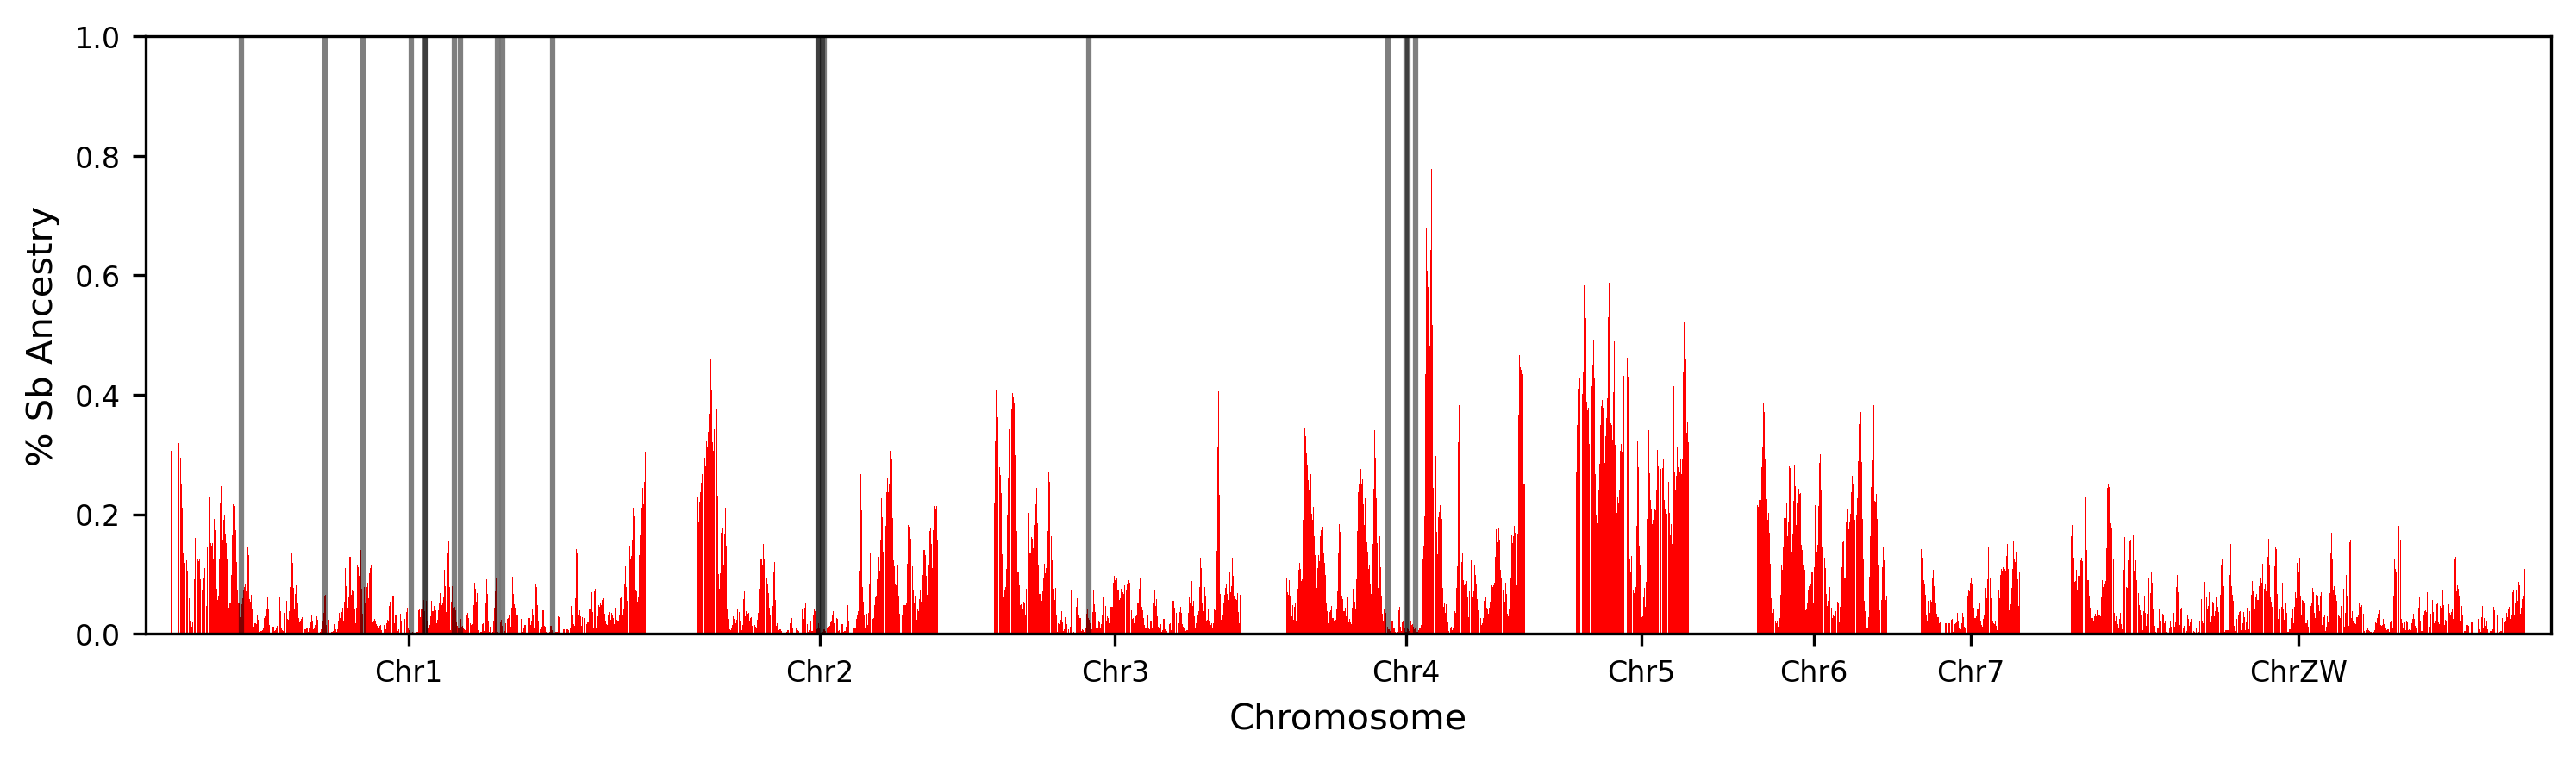

In [51]:
#plot weights
figure(figsize=(12, 3), dpi=300)

for index, row in rflp_df.iterrows():
    pos=row["x_pos"]
    plt.axvline(x = pos, color = 'black', label="RFLP", alpha=0.5)

# #ITS
# #NC_067196.1:21293218-21294122    
# # its_start = x_chr_pos["NC_067196.1"] + 21293218
# # its_stop = x_chr_pos["NC_067196.1"] + 21294122
# # w=its_stop - its_start
# # plt.axvline(x=its_start, label="ITS", color="blue", alpha=0.5)

   
w=twisst_df["stop"] - twisst_df["start"]
x=twisst_df["x_start"]

kernel_size=33
t1 = ndimage.uniform_filter(twisst_df["topo1"], size=kernel_size)

plt.bar(x, t1, w, label="Sb ancestry", color="red")

plt.xlabel("Chromosome")
plt.ylabel("% Sb Ancestry")
#plt.legend(title="Topologies", loc='upper right')
plt.xticks(chr_ticks, chr_labels, fontsize=8)
plt.yticks(fontsize=8)
plt.xlim([x.min()-5_000_000, x.max()+5_000_000])
plt.ylim([0,1])

# # for index, row in rflp_df.iterrows():
# #     pos=row["x_pos"]
# #     plt.axvline(x = pos, color = 'black')

# #plt.legend()

plt.savefig("twisst_k21_rflp.png", dpi=300)
plt.savefig("twisst_k21_rflp.svg")
plt.show()
plt.close()

In [ ]:
# add introgression percentages to its sample sheet

In [5]:
its_df = pd.read_csv("for_its.csv", sep=",", header=0)
its_df

,sample_name,pca_species,kmeans_label
0,Sb_NG_au_1.2,s_bovis,sb
1,Sb_NG_au_2.10,s_bovis,sb
2,Sb_NG_au_2.13,s_bovis,sb
3,Sb_NG_au_2.5,s_bovis,sb
4,Sb_NG_au_2.6,s_bovis,sb
...,...,...,...
136,ssp_niger_libore_167,s_haematobium,sh_nw
137,ssp_niger_libore_168,s_haematobium,sh_nw
138,ssp_niger_libore_169,s_haematobium,sh_nw
139,ssp_niger_libore_173,s_haematobium,sh_nw


In [48]:
rf_df = pd.read_csv("../rfmix/perc_indv.csv", sep=",", header=0)
rf_df

,sample_id,hap,rfmix_id,kmeans_label,bp_haem,perc_sh,perc_bov
0,Sb_NG_au_1.2,0,Sb_NG_au_1.2.0,sb,207981,0.000531,0.999469
1,Sb_NG_au_1.2,1,Sb_NG_au_1.2.1,sb,246466,0.000629,0.999371
2,Sb_NG_au_2.13,0,Sb_NG_au_2.13.0,sb,0,0.000000,1.000000
3,Sb_NG_au_2.13,1,Sb_NG_au_2.13.1,sb,70387,0.000180,0.999820
4,Sb_NG_be_1.5,0,Sb_NG_be_1.5.0,sb,13021,0.000033,0.999967
...,...,...,...,...,...,...,...
217,ssp_niger_libore_168,1,ssp_niger_libore_168.1,sh_nw,361466338,0.922278,0.077722
218,ssp_niger_libore_169,0,ssp_niger_libore_169.0,sh_nw,363656854,0.927867,0.072133
219,ssp_niger_libore_169,1,ssp_niger_libore_169.1,sh_nw,364577156,0.930216,0.069784
220,ssp_zambia_kafue_71,0,ssp_zambia_kafue_71.0,sh_se,391685246,0.999382,0.000618


In [52]:
perc_sb_df = rf_df.groupby('sample_id')['perc_bov'].mean().reset_index()

its_df["perc_sbov"] = ""

for index, row in its_df.iterrows():
    sample=row["sample_name"]
    
    try:
        perc_sb = perc_sb_df.loc[perc_sb_df["sample_id"] == sample, "perc_bov"].values[0]*100
    except:
        perc_sb=np.nan
        
    
    its_df.loc[index, "perc_sbov"] = perc_sb
    
its_df.head(50)

,sample_name,pca_species,kmeans_label,perc_sbov
0,Sb_NG_au_1.2,s_bovis,sb,99.942024
1,Sb_NG_au_2.10,s_bovis,sb,NaN
2,Sb_NG_au_2.13,s_bovis,sb,99.99102
3,Sb_NG_au_2.5,s_bovis,sb,NaN
4,Sb_NG_au_2.6,s_bovis,sb,NaN
5,Sb_NG_be_1.10,s_bovis,sb,NaN
6,Sb_NG_be_1.3,s_bovis,sb,NaN
7,Sb_NG_be_1.5,s_bovis,sb,99.984414
8,Sb_NG_en_1.1,s_bovis,sb,99.924297
9,Sh_NG_eb_6_2,s_haematobium,sh_nw,22.199875


In [53]:
its_df.to_csv("for_its_w_sb_perc.csv", header=True, index=False)

In [54]:
!pwd

/master/nplatt/sch_hae_scan/results/rflps
